<a href="https://colab.research.google.com/github/MelquisDavid/ejercicios-ciencia-datos/blob/master/youtube_trending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de los vídeos que son tendencia en YouTube

## Introducción

YouTube es la plataforma de vídeo más popular y más utilizada en el mundo actualmente. YouTube tiene [una lista de **vídeos de tendencia**](https://www.youtube.com/feed/trending) que se actualiza constantemente. Aquí utilizaremos **Python** con algunos paquetes como **Pandas** y **Matplotlib** para analizar un conjunto de datos que se recogió durante 205 días. Para cada uno de esos días, el conjunto de datos contiene información sobre los vídeos que son tendencia ese día. Contiene datos sobre **más de $40.000$ vídeos que son tendencia**. Analizaremos estos datos para obtener información sobre los vídeos que son tendencia en YouTube, para ver qué hay de común entre estos vídeos. Estos datos también pueden ser utilizados por personas que quieren aumentar la popularidad de sus vídeos en YouTube.

El conjunto de datos que utilizaremos se obtiene de Kaggle [aquí](https://www.kaggle.com/datasnaek/youtube-new). Contiene datos sobre los vídeos que son tendencia en muchos países. Aquí analizaremos los vídeos que son tendencia en Estados Unidos. 

## Objetivos del análisis

Queremos responder a preguntas como:
* ¿Cuántas visualizaciones tienen nuestros vídeos de tendencia? ¿La mayoría de ellos tienen un gran número de visualizaciones? ¿Es necesario tener un gran número de visualizaciones para que un vídeo se convierta en trending?
* Las mismas preguntas anteriores, pero aplicadas a los "me gusta" y a los comentarios en lugar de a las visualizaciones.
* ¿Qué vídeo ha permanecido más tiempo en la lista de "trendin-videos"?
* ¿Cuántos vídeos que son tendencia contienen una palabra en mayúsculas en sus títulos?
* ¿Cuál es la longitud de los títulos de los vídeos que son tendencia? ¿Está relacionada esta longitud con el hecho de que el vídeo sea tendencia?
* ¿Cómo se correlacionan (se relacionan) las visualizaciones, los "me gusta", los "no me gusta", el número de comentarios, la longitud del título y otros atributos? ¿Cómo están conectados?
* ¿Cuáles son las palabras más comunes en los títulos de los vídeos que están de moda?
* ¿Cuáles canales de YouTube tienen el mayor número de vídeos que son tendencia?
* ¿Cuál categoría de vídeo (por ejemplo, entretenimiento, juegos, comedia, etc.) tiene el mayor número de vídeos que son tendencia?
* ¿Cuándo se han publicado los vídeos que son tendencia? ¿En qué días de la semana? ¿En qué momentos del día?

## Tabla de contenidos

* [Importar algunos paquetes](#import)
* [Leer el conjunto de datos](#read)
* [Obtener una sensación del conjunto de datos](#feel)
* [Limpieza de datos](#clean)
* [Colección de datos años](#coll)
* [Descripción de las columnas numéricas](#descn)
    * [Histograma de vistas](#vh)
    * [Histograma de gustos](#lh)
    * [Histograma de recuento de comentarios](#ch)
* [Descripción en columnas no numéricas](#descnn)
* [¿Cuántos títulos de vídeo que son tendencia contienen una palabra en mayúsculas?](#cap)
* [Longitud de los títulos de los vídeos](#len)
* [Correlación entre las variables del conjunto de datos](#corr)
* [Palabras más comunes en los títulos de vídeo](#commti)
* [¿Qué canales tienen el mayor número de vídeos que son tendencia?](#chan)
* [¿Qué categoría de vídeo tiene el mayor número de vídeos que son tendencia?](#cat)
* [Vídeos que son tendencia y su tiempo de publicación](#pub)
* [¿Cuántos vídeos que son tendencia tienen un error?](#err)
* [¿Cuántos vídeos que son tendencia tienen los comandos desactivados?](#commdis)
* [¿Cuántos vídeos que son tendencia tienen sus calificaciones deshabilitadas?](#ratdis)
* [¿Cuántos vídeos tienen deshabilitados tanto los comentarios como las valoraciones?](#commratdis)
* [Conclusiones](#conc)

¡Comencemos!

## <a name="import"></a>Importar algunos paquetes
En primer lugar, importamos algunos paquetes de Python que nos ayudarán a analizar los datos, especialmente `pandas` para el análisis de datos y `matplotlib` para la visualización.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
from pathlib import Path

In [ ]:
# Ocultando advertencias para un despliegue más limpio
warnings.filterwarnings('ignore')

# Configurando algunas opciones
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Para gráficos interactivos descomentar la siguiente línea
# %matplotlib notebook

## <a name="read"></a>Leyendo el conjunto de datos
A continuación leemos el archivo del conjunto de datos, que se encuentra en formato csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATA_DIR = Path.cwd() / "drive/MyDrive/fpalm/data/"
DATA_DIR

PosixPath('/content/drive/MyDrive/fpalm/data')

In [ ]:
df = pd.read_parquet(f"{DATA_DIR / 'youtube_trending/USvideos.parquet'}")

Establecemos algunas opciones de configuración sólo para mejorar los gráficos de visualización; nada muy relevante

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Cómo percibir el conjunto de datos
Vamos a conocer nuestro conjunto de datos mostrando sus primeras filas

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Ahora, veamos algo de información sobre nuestro conjunto de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Podemos ver que hay `40.949` entradas en el conjunto de datos. También podemos ver que todas las columnas del conjunto de datos están completas (es decir, tienen `40.949` entradas no nulas) excepto la columna `description` que tiene algunos valores `nulos`; sólo tiene `40.379` valores no nulos.

## <a name="clean"></a>Limpieza de datos

La columna `description` tiene algunos valores nulos. Estas son algunas de las filas cuyos valores de descripción son nulos. Podemos ver que los valores nulos se indican con `None`.

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,None
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,None
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,None


Así que para hacer algún tipo de limpieza de datos, y para deshacerse de esos valores nulos, ponemos una cadena vacía en lugar de cada valor nulo en la columna `description`

In [ ]:
df["description"] = df["description"].fillna(value="")

## <a name="coll"></a>Años de recogida del conjunto de datos
Veamos en qué años se recogió el conjunto de datos

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


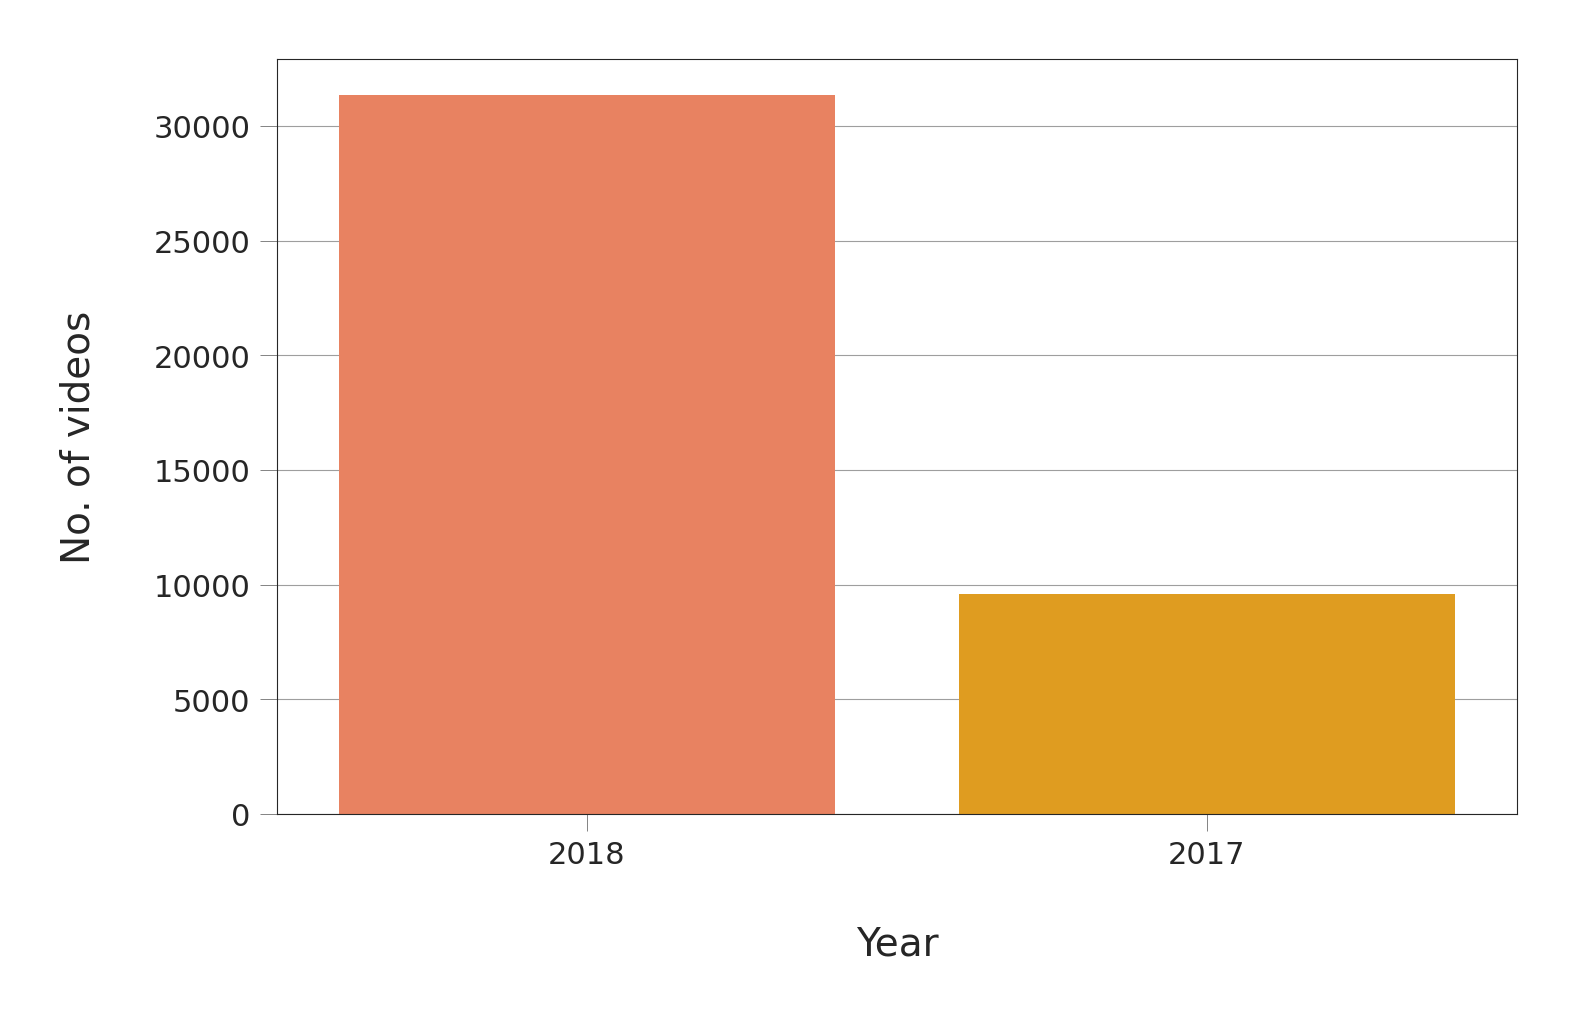

In [ ]:
cdf = (
    df["trending_date"]
    .apply(lambda x: "20" + x[:2])
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "year", "trending_date": "No_of_videos"})
)

fig, ax = plt.subplots()
_ = sns.barplot(
    x="year",
    y="No_of_videos",
    data=cdf,
    palette=sns.color_palette(["#ff764a", "#ffa600"], n_colors=7),
    ax=ax,
)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [ ]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

Podemos ver que el conjunto de datos se recogió en 2017 y 2018, con un `77%` de ellos en 2018 y un `23%` en 2017.

## <a name="descn"></a>Descripción de las columnas numéricas
Veamos ahora alguna información estadística sobre las columnas numéricas de nuestro conjunto de datos

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


En la tabla anterior observamos que 
- El número medio de visualizaciones de un vídeo que es tendencia es de `2.360.784`. El valor medio del número de visualizaciones es `681.861`, lo que significa que la mitad de los vídeos que son tendencia tienen visualizaciones inferiores a esa cifra, y la otra mitad tienen visualizaciones superiores a esa cifra
- El número medio de "me gusta" de un vídeo que es tendencia es de `74.266`, mientras que el número medio de "no me gusta" es de `3.711`. En 
- número medio de comentarios es de `8.446`, mientras que la mediana es de `1.856`.

¿Qué utilidad tienen las observaciones anteriores? ¿Representan realmente los datos? Examinemos más. 

### <a name="vh"></a>Histograma de vistas

Vamos a trazar un [histograma](https://www.mathsisfun.com/data/histograms.html) para la columna `vistas` para echar un vistazo a su distribución: para ver cuántos vídeos tienen entre `10` millones y `20` millones de visitas, cuántos vídeos tienen entre `20` millones y `30` millones de visitas, etc.

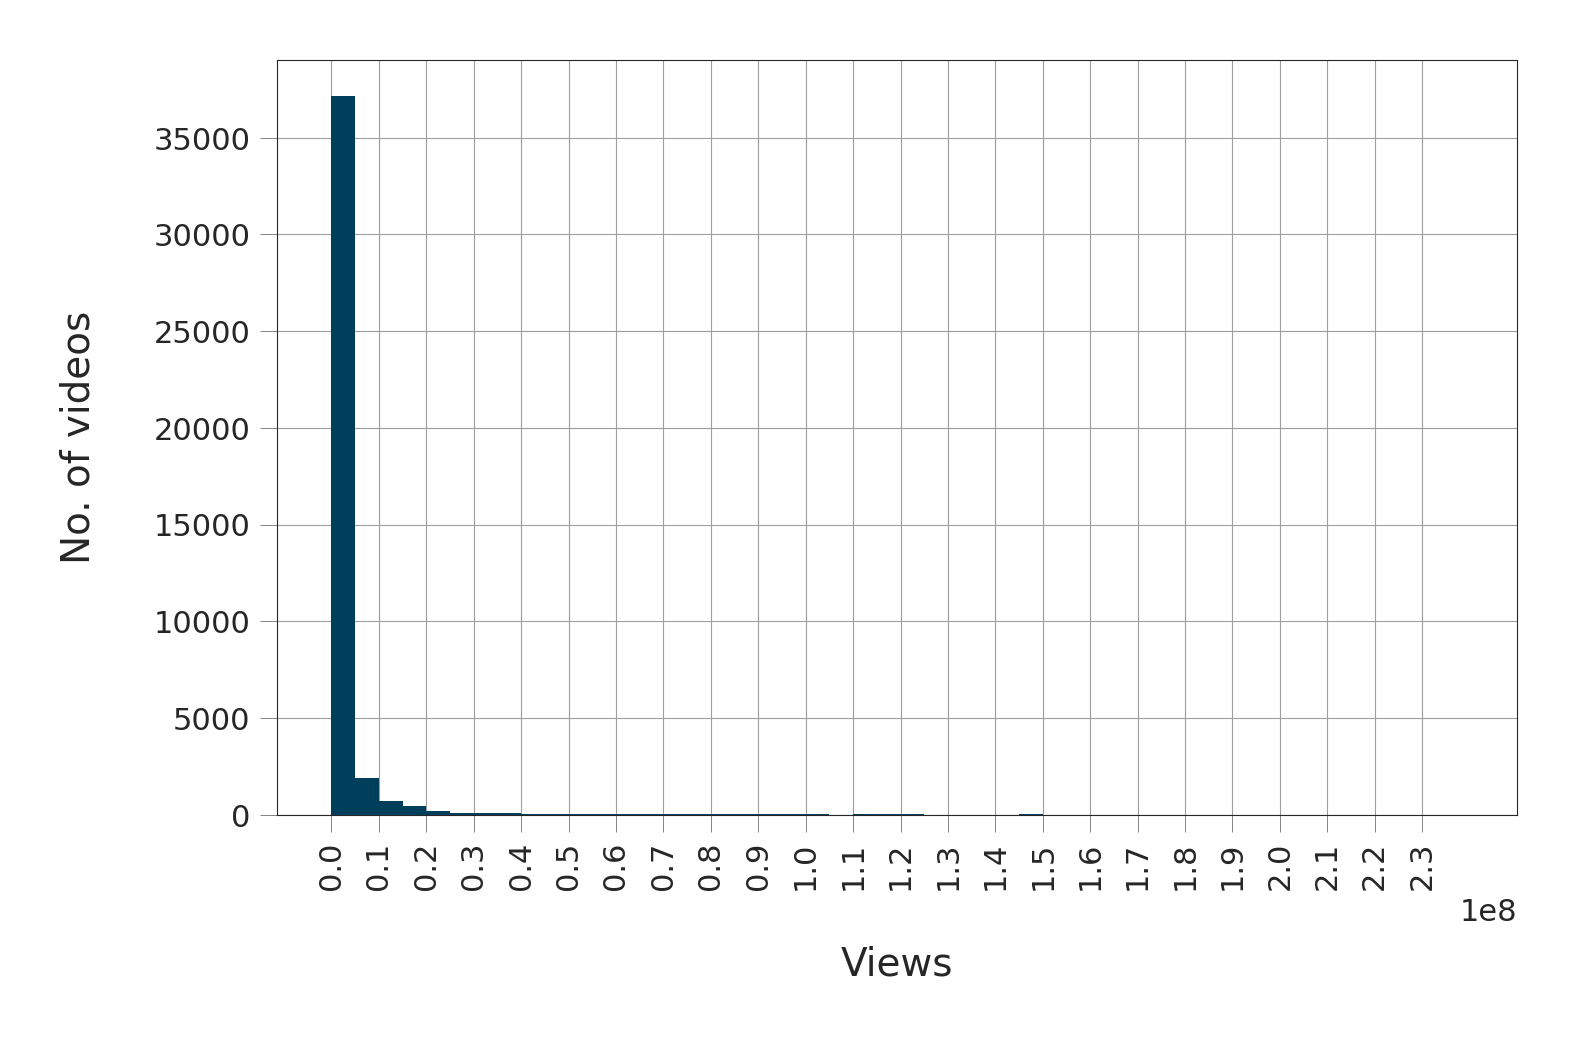

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(
    df["views"],
    kde=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    bins=np.linspace(0, 2.3e8, 47),
    ax=ax,
)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

Observamos que la gran mayoría de los vídeos que son tendencia tienen "5" millones de visitas o menos. Obtenemos la cifra de "5 millones" calculando

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Ahora vamos a trazar el histograma sólo para los vídeos con `25` millones de visualizaciones o menos para ver más de cerca la distribución de los datos

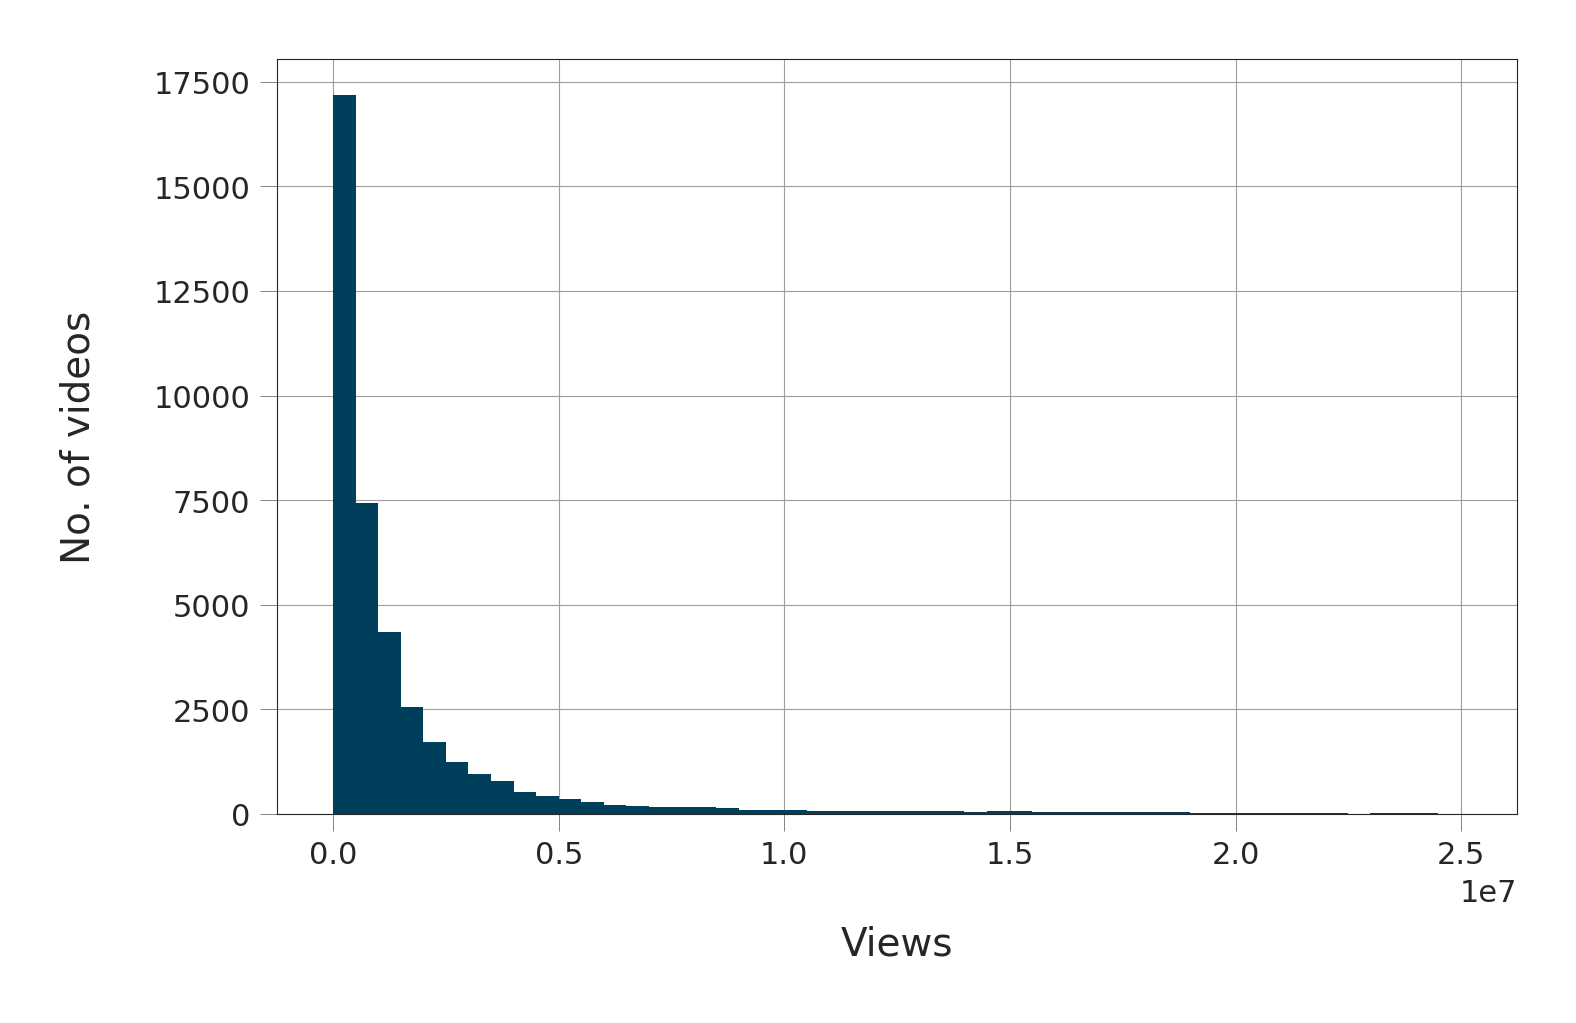

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(
    df[df["views"] < 25e6]["views"],
    kde=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    ax=ax,
)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Ahora vemos que la mayoría de los vídeos que son tendencia tienen `1` millón de visitas o menos. Veamos el porcentaje exacto de vídeos con menos de un millón de visitas

In [ ]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

Por lo tanto, está en torno al `60%`. Del mismo modo, podemos ver que el porcentaje de vídeos con menos de `1,5` millones de visitas es de alrededor del `71%`, y que el porcentaje de vídeos con menos de `5` millones de visitas es de alrededor del `91%`.

### <a name="lh"></a>Histograma de likes

Después de las `views`, trazamos el histograma de la columna `likes`

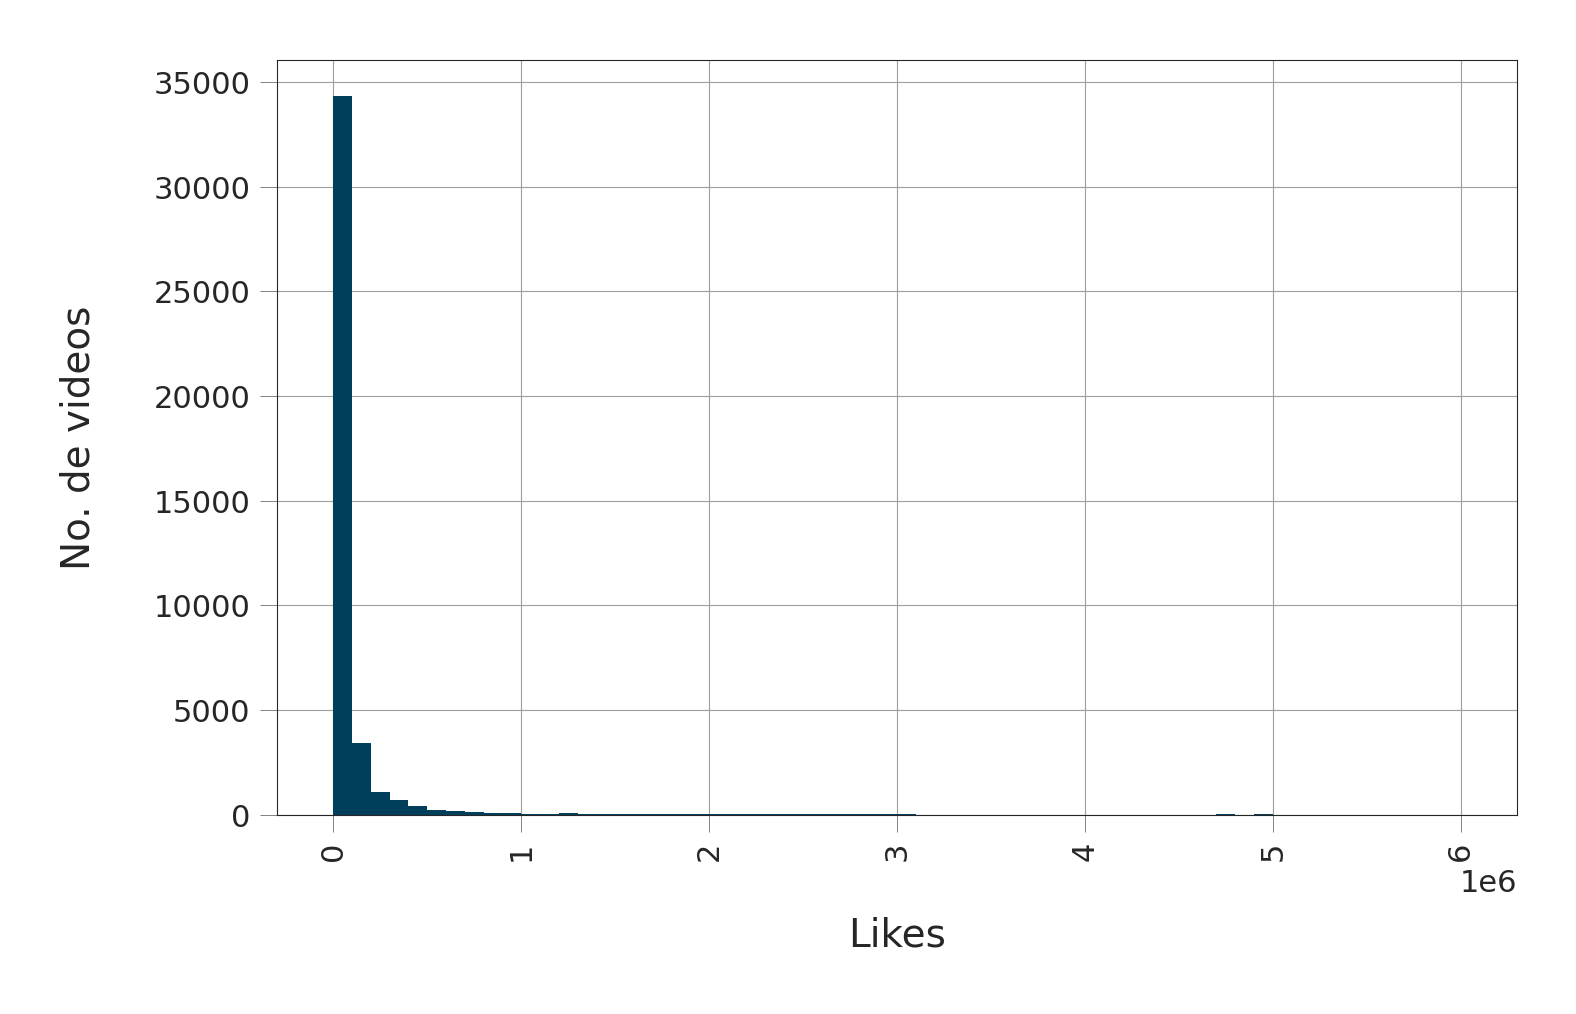

In [ ]:
plt.rc("figure.subplot", wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(
    df["likes"],
    kde=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    bins=np.linspace(0, 6e6, 61),
    ax=ax,
)
_ = ax.set(xlabel="Likes", ylabel="No. de videos")
_ = plt.xticks(rotation=90)

Observamos que la gran mayoría de los vídeos que son tendencia tienen entre `0` y `100.000` likes. Para ver mejor la distribución de los datos, tracemos el histograma de los vídeos con `1000,000` o menos.

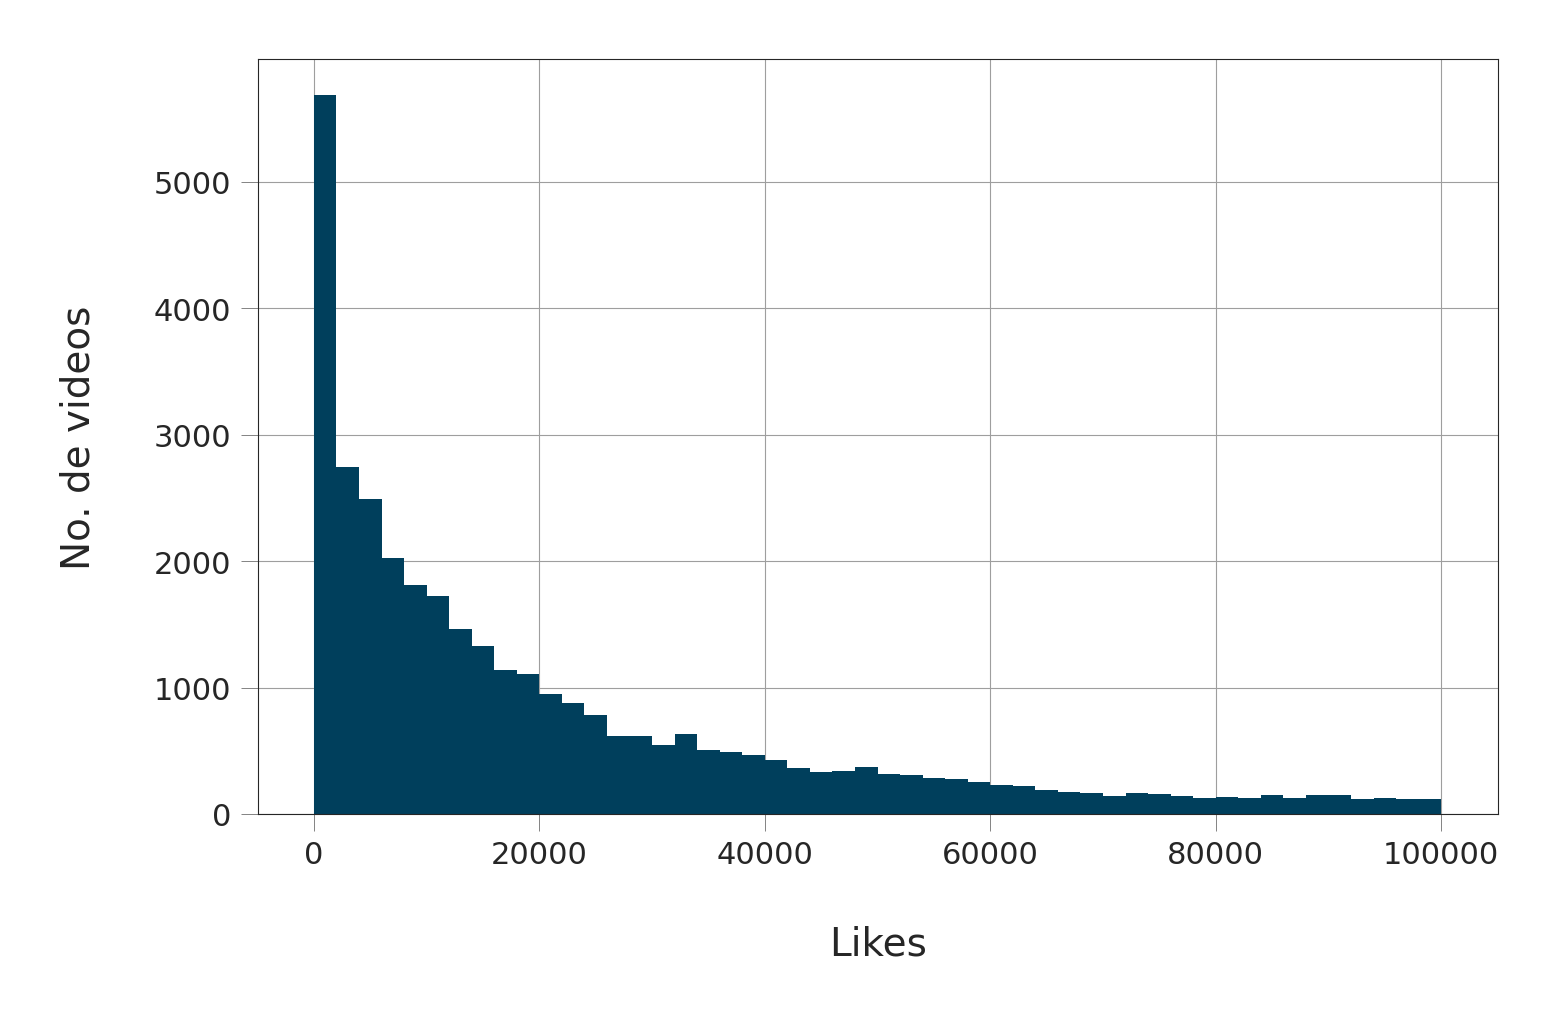

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(
    df[df["likes"] <= 1e5]["likes"],
    kde=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    ax=ax,
)
_ = ax.set(xlabel="Likes", ylabel="No. de videos")

Ahora podemos ver que la mayoría de los vídeos que son tendencia tienen `40000` likes o menos, con un pico de vídeos con `2000` likes o menos. 

Veamos el porcentaje exacto de vídeos con menos de `40000` likes 

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

68.4900730176561

Asimismo, podemos ver que el porcentaje de vídeos con menos de `100,000` "me gusta" es de alrededor del `84%`.

### <a name="ch"></a>Histograma del recuento de comentarios

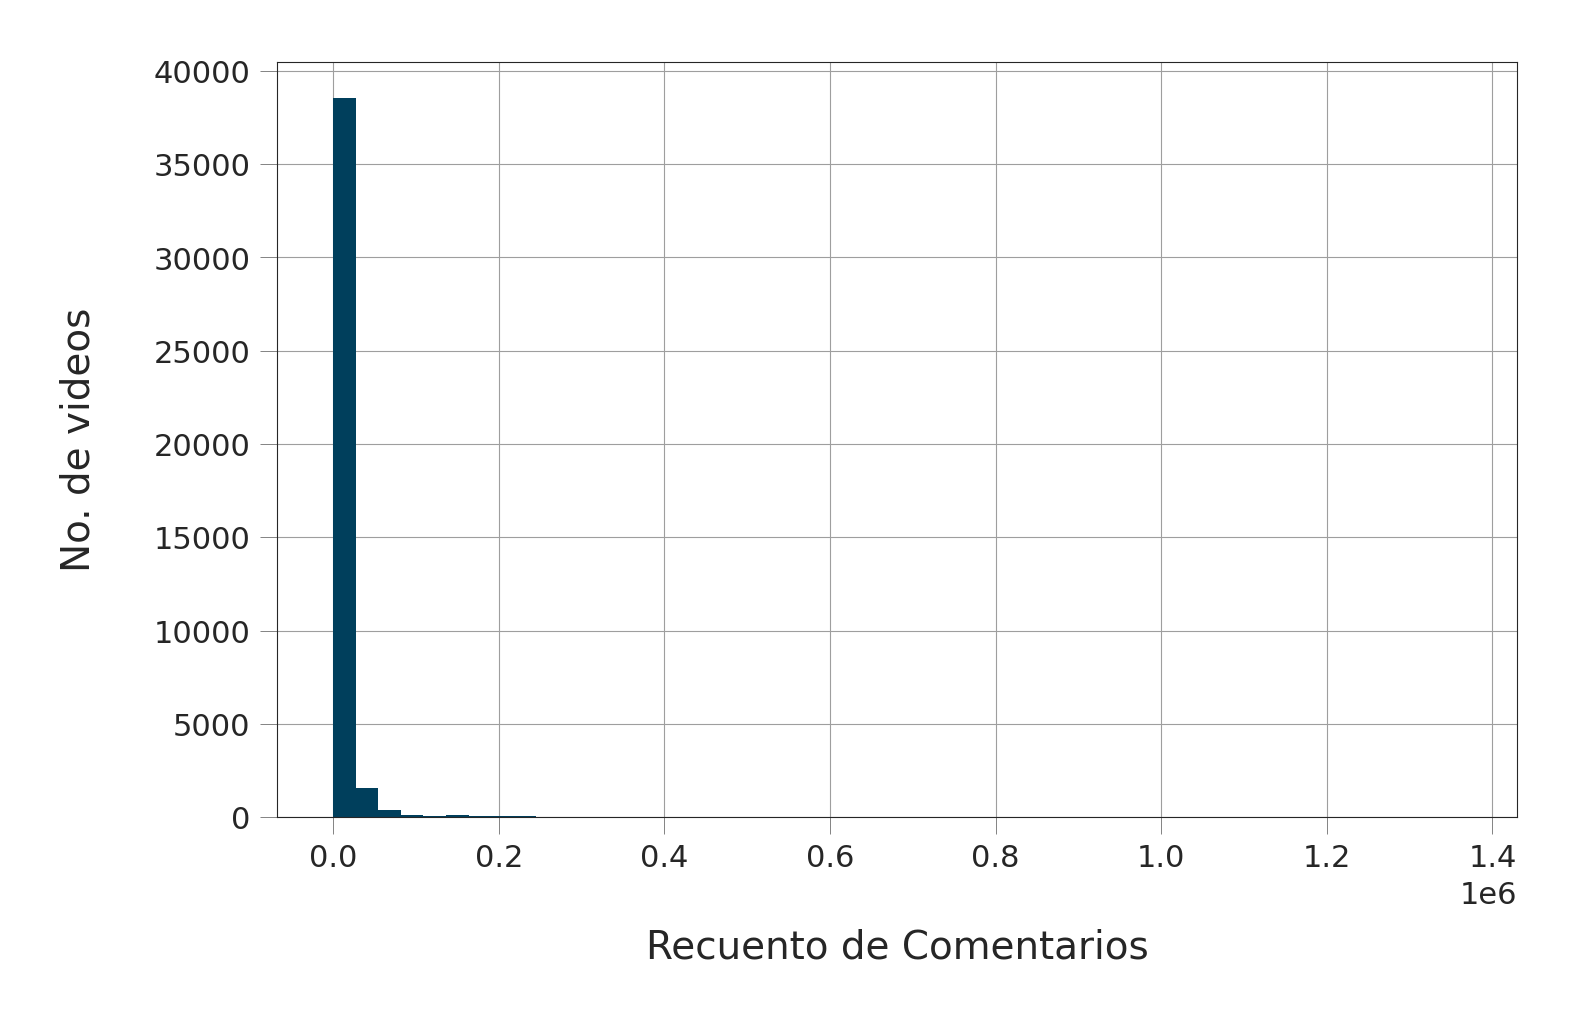

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(
    df["comment_count"],
    kde=False,
    rug=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    ax=ax,
)
_ = ax.set(xlabel="Recuento de Comentarios", ylabel="No. de videos")

Veamos más de cerca eliminando las entradas con un número de comentarios superior a `200000`.

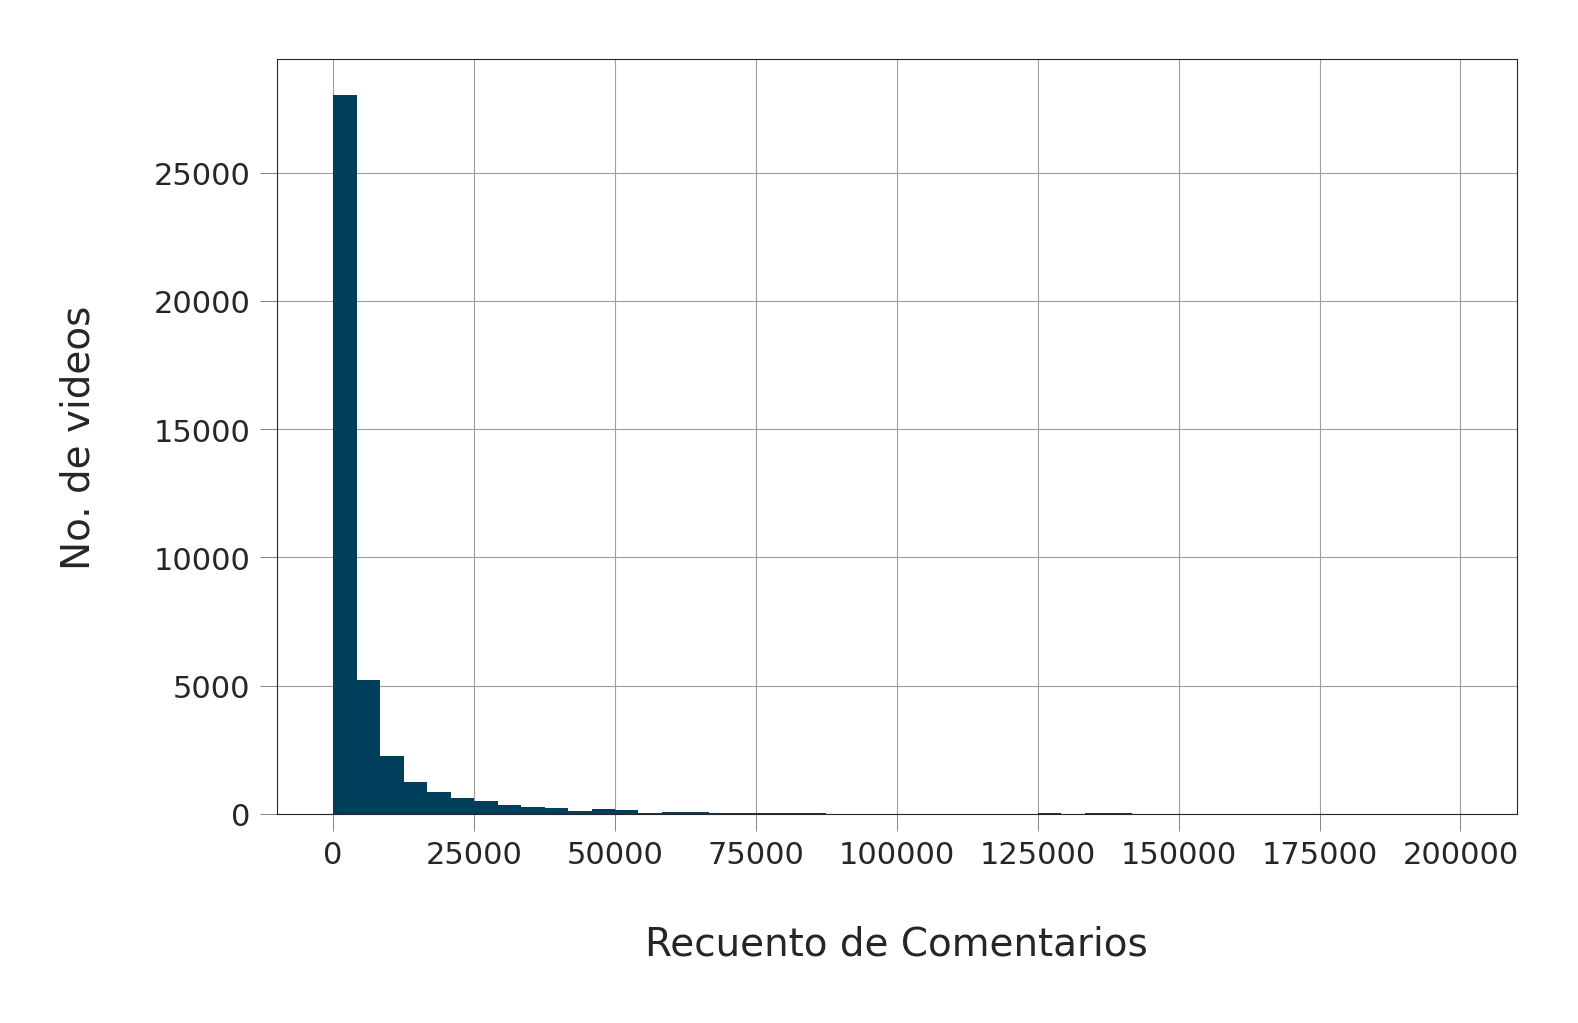

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(
    df[df["comment_count"] < 200000]["comment_count"],
    kde=False,
    rug=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    bins=np.linspace(0, 2e5, 49),
    ax=ax,
)
_ = ax.set(xlabel="Recuento de Comentarios", ylabel="No. de videos")

Vemos que la mayoría de los vídeos que son tendencia tienen alrededor de

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comentarios}
\end{align}

ya que cada división en el gráfico tiene seis bins de histograma.

Al igual que con las visualizaciones y los likes, veamos el porcentaje exacto de vídeos con menos de `4000` comentarios

In [ ]:
df[df["comment_count"] < 4000]["comment_count"].count() / df[
    "comment_count"
].count() * 100

67.48882756599673

Del mismo modo, podemos ver que el porcentaje de vídeos con menos de `25.000` comentarios ronda el `93%`.

## <a name="descnn"></a>Descripción de las columnas no numéricas
Después de haber descrito las columnas numéricas anteriormente, ahora describimos las columnas no numéricas

In [ ]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,18.17.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


En la tabla anterior, podemos ver que hay `205` fechas únicas, lo que significa que nuestro conjunto de datos contiene datos recopilados sobre los vídeos de tendencia durante **`205`** días.

A partir de la descripción de `video_id`, podemos ver que hay `40949` vídeos (lo que es de esperar porque nuestro conjunto de datos contiene `40949` entradas), pero también podemos ver que sólo hay `6351` vídeos únicos, lo que significa que algunos vídeos aparecieron en la lista de vídeos de tendencia **en más de un día**.
La tabla también nos dice que el título más frecuente es "Hicimos llorar a nuestra madre... ¡su sueño se hizo realidad!" y que apareció `30` veces en la lista de vídeos más populares.

Pero hay algo extraño en la tabla de descripciones de arriba: Dado que hay `6351` IDs de vídeo únicos, esperamos que haya `6351`títulos de vídeo únicos también, porque suponemos que cada ID está vinculado a un título correspondiente. Una posible interpretación es que un vídeo que es tendencia tenía algún título cuando apareció en la lista de tendencias, y luego volvió a aparecer otro día pero con un título modificado. Una explicación similar se aplica también a la columna `description`.
En el caso de la columna `publish_time`, los valores únicos son inferiores a `6351`, pero no hay nada extraño en ello, ya que dos vídeos diferentes pueden publicarse al mismo tiempo.

Para verificar nuestra interpretación de la columna `title`, veamos un ejemplo en el que un vídeo que es tendencia aparece más de una vez en la lista de tendencias pero con títulos diferentes

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g["title"].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...


Podemos ver que este vídeo apareció en la lista con dos títulos diferentes.

## <a name="cap"></a>¿Cuántos títulos de vídeos que son tendencia contienen una palabra en mayúsculas?
Ahora queremos ver cuántos títulos de vídeo que son tendencia contienen al menos una palabra en mayúsculas (por ejemplo, CÓMO). Para ello, añadiremos una nueva variable (columna) al conjunto de datos cuyo valor será `True` si el título del vídeo contiene al menos una palabra en mayúsculas, y `False` en caso contrario

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


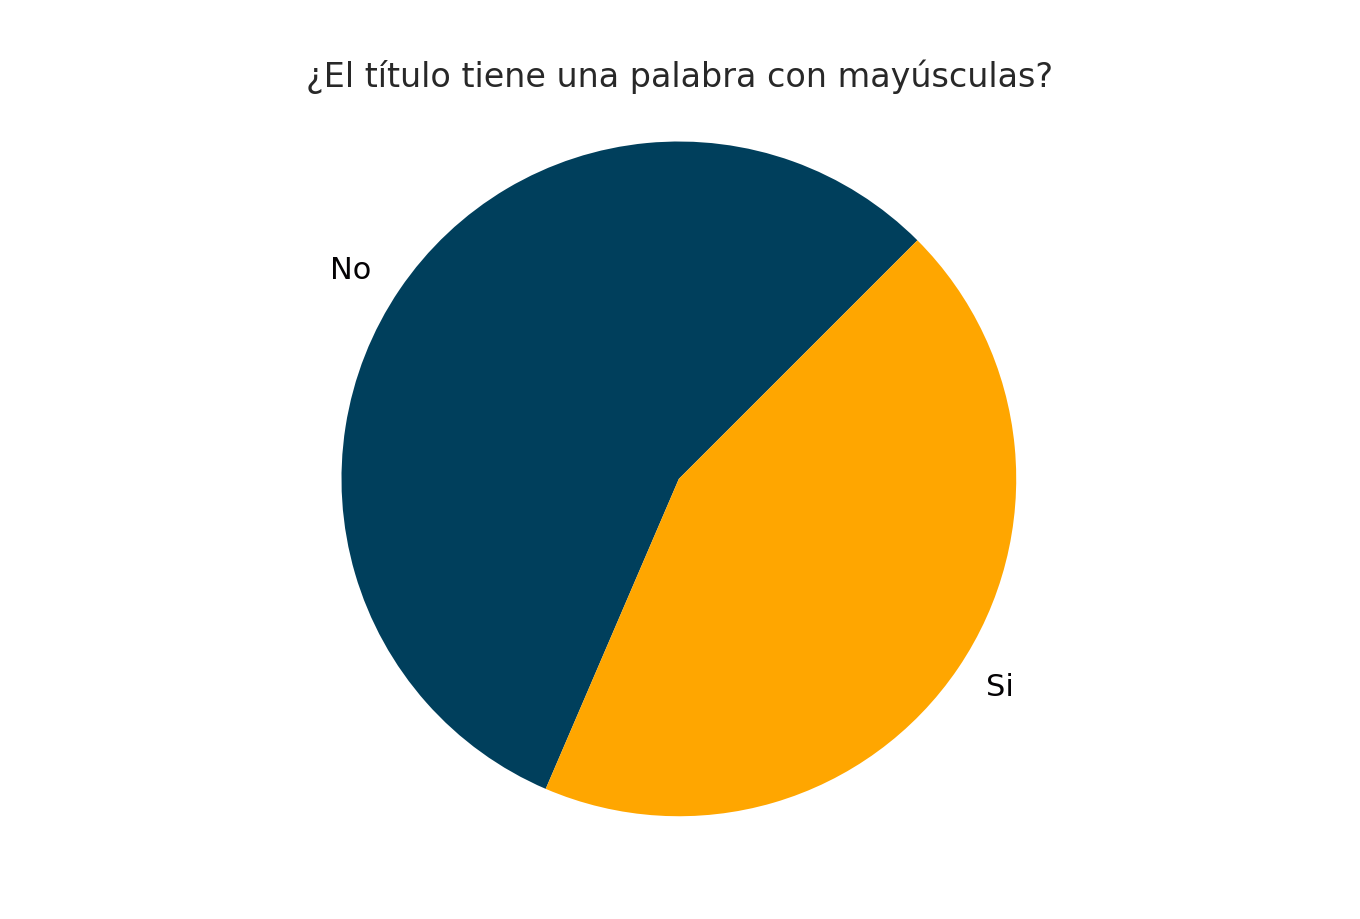

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(
    [value_counts[False], value_counts[True]],
    labels=["No", "Si"],
    colors=["#003f5c", "#ffa600"],
    textprops={"color": "#040204"},
    startangle=45,
)
_ = ax.axis("equal")
_ = ax.set_title("¿El título tiene una palabra con mayúsculas?")

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

Podemos ver que el 44% de los títulos de vídeo que son tendencia contienen al menos una palabra en mayúscula. Más adelante utilizaremos esta nueva columna añadida `contains_capitalized` para analizar la correlación entre variables.

## <a name="len"></a>Longitudes de los títulos de los vídeos
Añadamos otra columna a nuestro conjunto de datos para representar la longitud de cada título de vídeo, y a continuación tracemos el histograma de la longitud de los títulos para hacernos una idea de las longitudes de los títulos de vídeo en tránsito

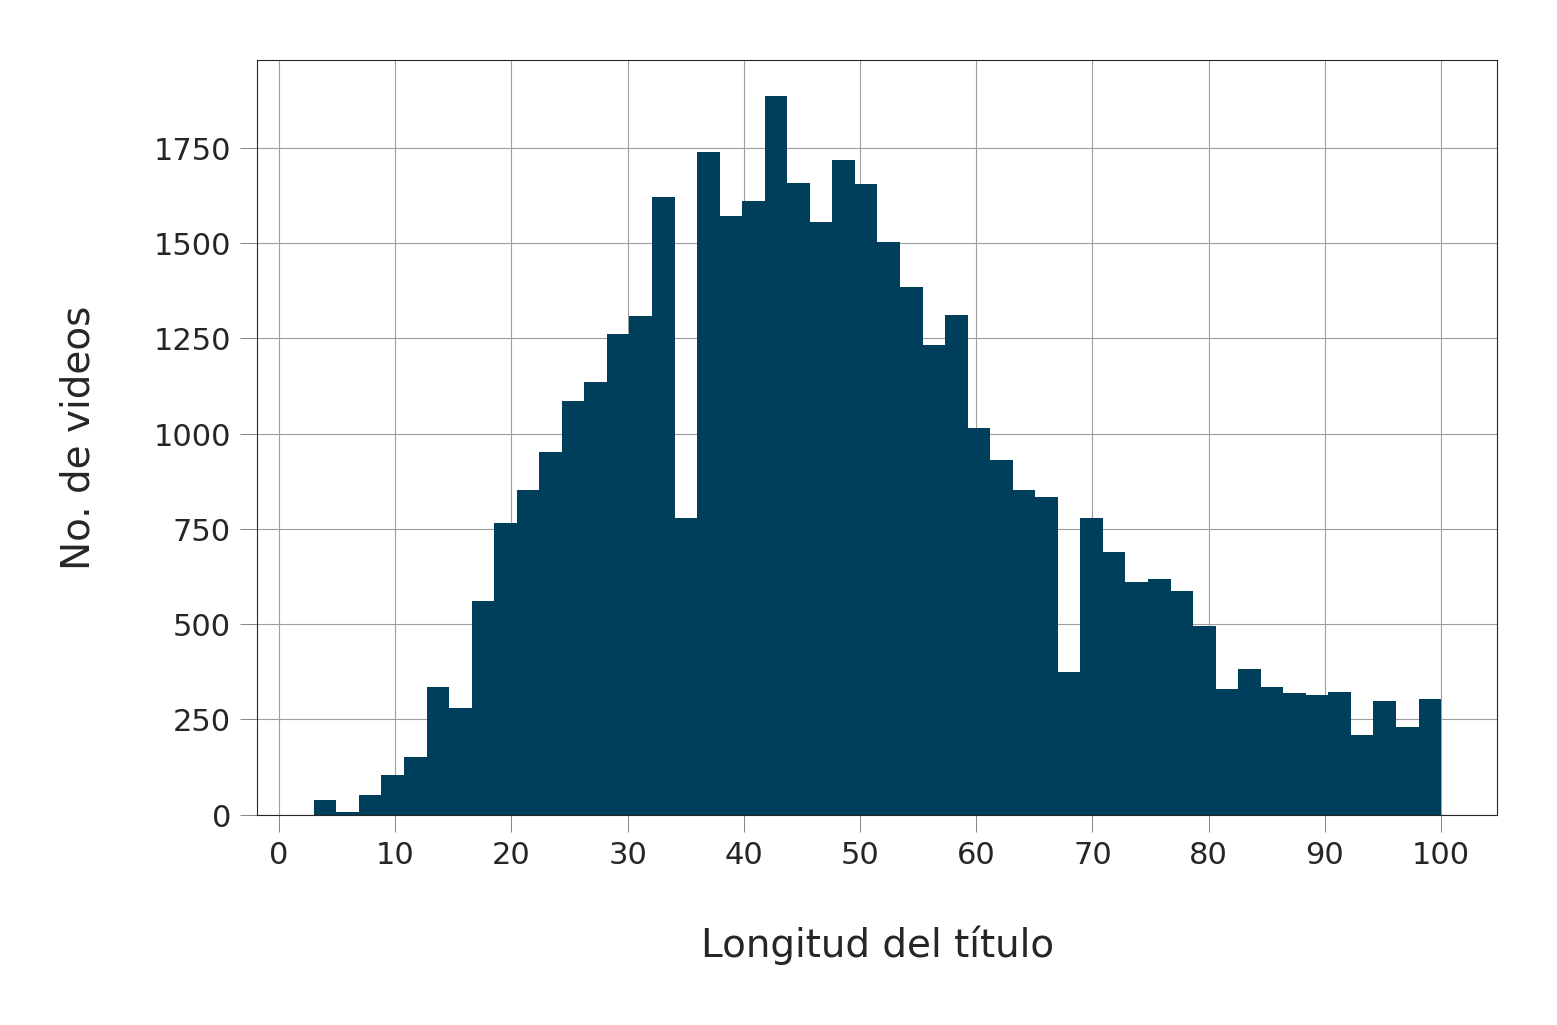

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(
    df["title_length"],
    kde=False,
    rug=False,
    color=PLOT_COLORS[4],
    hist_kws={"alpha": 1},
    ax=ax,
)
_ = ax.set(
    xlabel="Longitud del título", ylabel="No. de videos", xticks=range(0, 110, 10)
)

Podemos ver que la distribución de la longitud del título se asemeja a una distribución normal, en la que la mayoría de los vídeos tienen una longitud de título entre 30 y 60 caracteres aproximadamente.

Ahora vamos a dibujar un [gráfico de dispersión](https://www.mathsisfun.com/data/scatter-xy-plots.html) entre la longitud del título y el número de visualizaciones para ver la relación entre estas dos variables

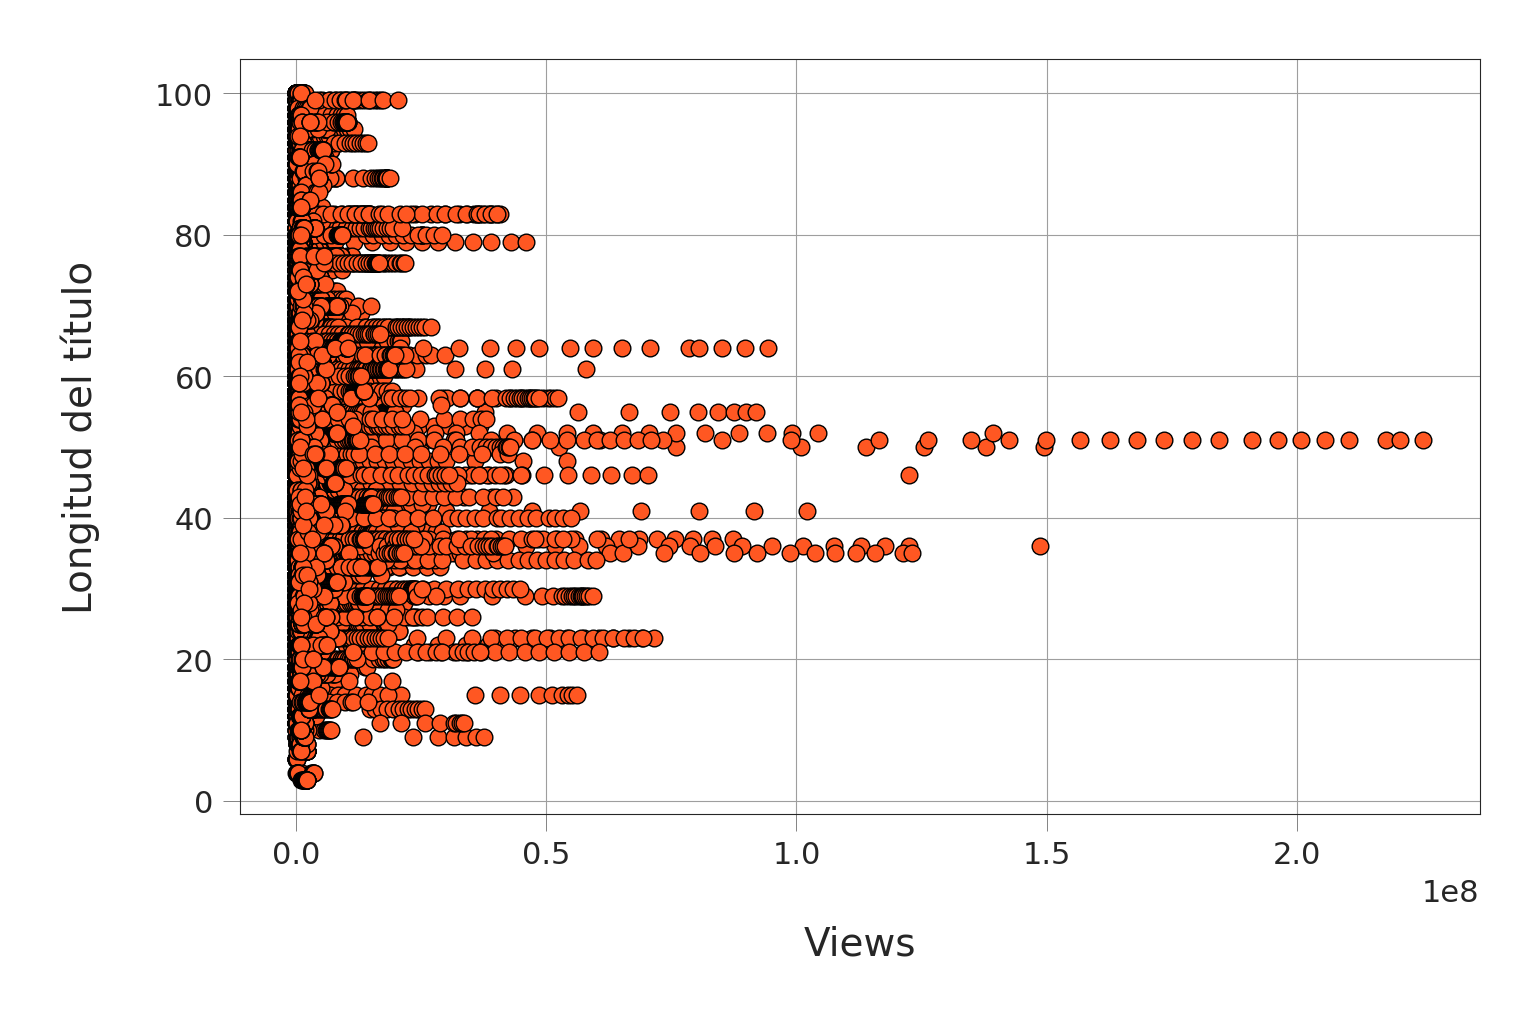

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(
    x=df["views"],
    y=df["title_length"],
    color=PLOT_COLORS[2],
    edgecolors="#000000",
    linewidths=0.5,
)
_ = ax.set(xlabel="Views", ylabel="Longitud del título")

Observando el gráfico de dispersión, podemos decir que no hay relación entre la longitud del título y el número de visualizaciones. Sin embargo, observamos algo interesante: los vídeos que tienen `100.000.000` de visualizaciones y más tienen una longitud de título entre `33` y `55` caracteres aproximadamente.

## <a name="corr"></a>Correlación entre las variables del conjunto de datos
Ahora vamos a ver cómo las variables del conjunto de datos están [correlacionadas](https://www.mathsisfun.com/data/correlation.html) entre sí: por ejemplo, nos gustaría ver cómo están correlacionadas las visualizaciones y los "likes", es decir, ¿las visualizaciones y los "likes" aumentan y disminuyen juntos (correlación positiva)? ¿Aumenta uno de ellos cuando el otro disminuye y viceversa (correlación negativa)? ¿O no están correlacionados?

La correlación se representa como un valor entre `-1` y `+1` donde `+1` denota la mayor correlación positiva, `-1` denota la mayor correlación negativa, y `0` denota que no hay correlación.

Veamos la tabla de correlación entre las variables de nuestro conjunto de datos (sólo variables numéricas y booleanas)

In [ ]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,0.13,1.00


Vemos, por ejemplo, que las visualizaciones y los likes están muy correlacionados positivamente, con un valor de correlación de `0.85`; también vemos una alta correlación positiva (`0.80`) entre los "likes" y el número de comentarios, y entre los "dislikes" y el número de comentarios (`0.70`). 

Existe una correlación positiva entre las visitas y los "no me gusta", entre las visitas y el número de comentarios, y entre los "me gusta" y los "no me gusta".

Ahora vamos a visualizar la tabla de correlación anterior utilizando un [mapa de calor](https://www.wikiwand.com/en/Heat_map)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


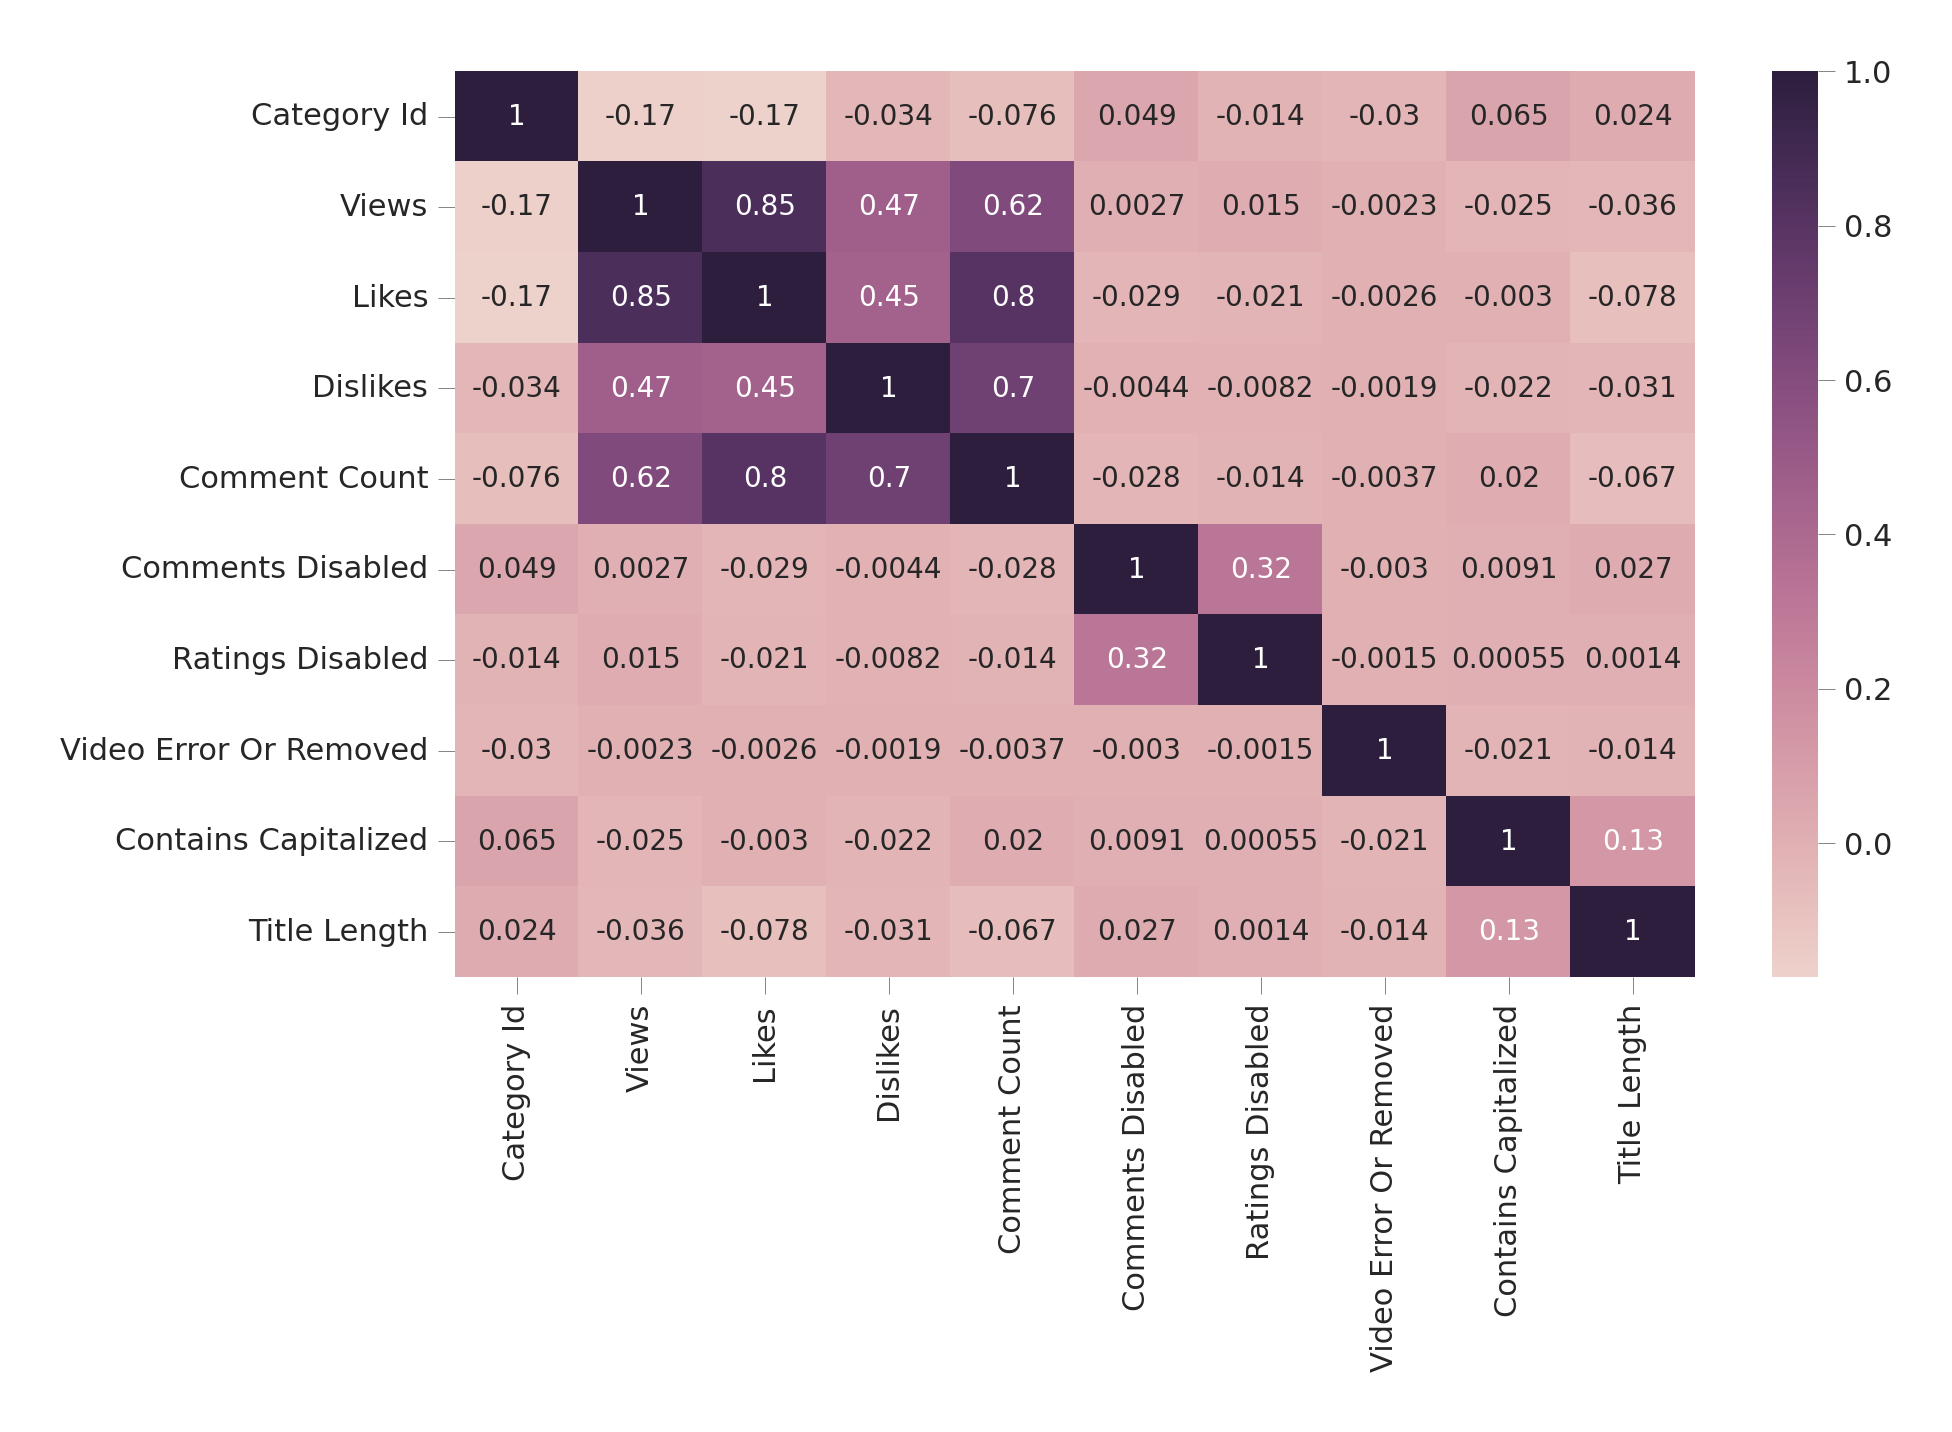

In [ ]:
h_labels = [
    x.replace("_", " ").title()
    for x in list(df.select_dtypes(include=["number", "bool"]).columns.values)
]

fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(
    df.corr(),
    annot=True,
    xticklabels=h_labels,
    yticklabels=h_labels,
    cmap=sns.cubehelix_palette(as_cmap=True),
    ax=ax,
)

El mapa de correlación y la tabla de correlación anteriores indican que las visualizaciones y los "me gusta" están muy correlacionados positivamente. Verifiquemos esto trazando un gráfico de dispersión entre vistas y gustos para visualizar la relación entre estas variables

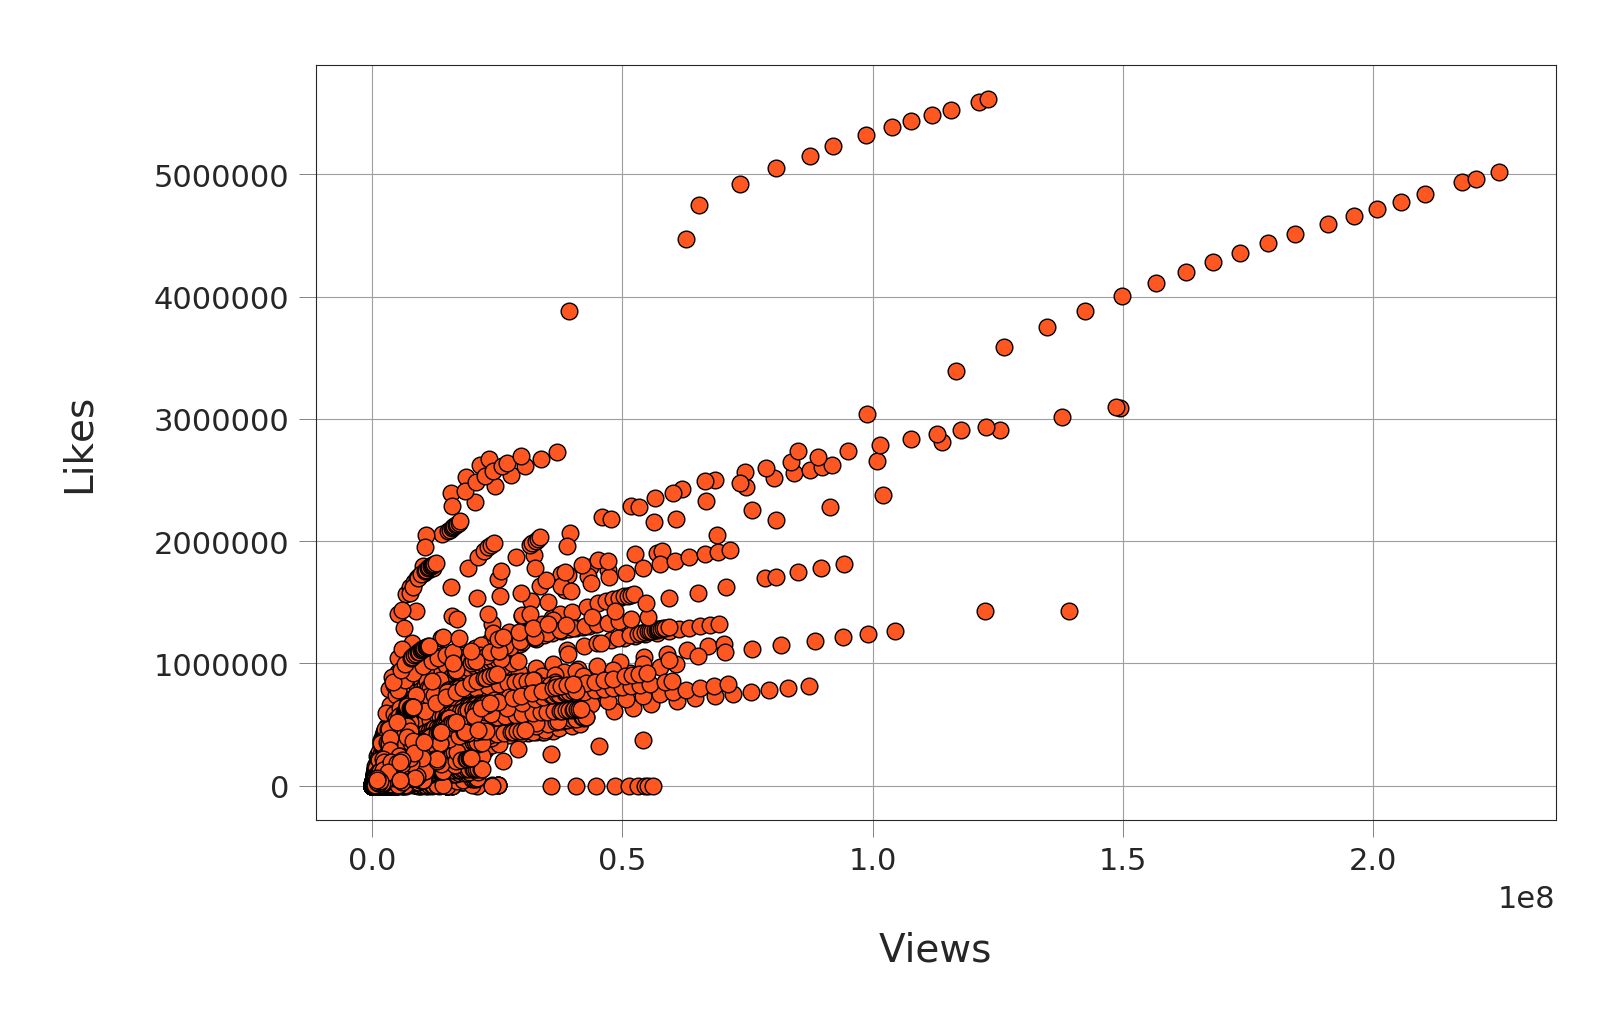

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(
    x=df["views"],
    y=df["likes"],
    color=PLOT_COLORS[2],
    edgecolors="#000000",
    linewidths=0.5,
)
_ = ax.set(xlabel="Views", ylabel="Likes")

Vemos que las visualizaciones y los "me gusta" están realmente correlacionados de forma positiva: a medida que uno aumenta, el otro también lo hace, en su mayoría.

Otra comprobación de la matriz y el mapa de correlación es el gráfico de dispersión que dibujamos anteriormente entre las visualizaciones y la longitud del título, ya que muestra que no hay correlación entre ellos.

## <a name="commti"></a>Palabras más comunes en los títulos de los vídeos

Veamos si hay algunas palabras que se utilizan significativamente en los títulos de los vídeos que son tendencia. Vamos a mostrar las `25` palabras más comunes en todos los títulos de vídeos que son tendencia

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

Ignorando palabras como "el" y "de", podemos ver que los símbolos "-" y "|" aparecieron mucho en los `40949` títulos de vídeo de tendencia: `11452` veces y `10663` veces respectivamente. También observamos que las palabras "Vídeo", "Tráiler", "Cómo" y "2018" son comunes en los títulos de los vídeos que son tendencia; cada una de ellas apareció en 1613-1901 títulos de vídeos.

Dibujemos una nube de palabras para los títulos de nuestros vídeos de tendencia, que es una forma de visualizar las palabras más comunes en los títulos; cuanto más común es la palabra, mayor es su tamaño de letra

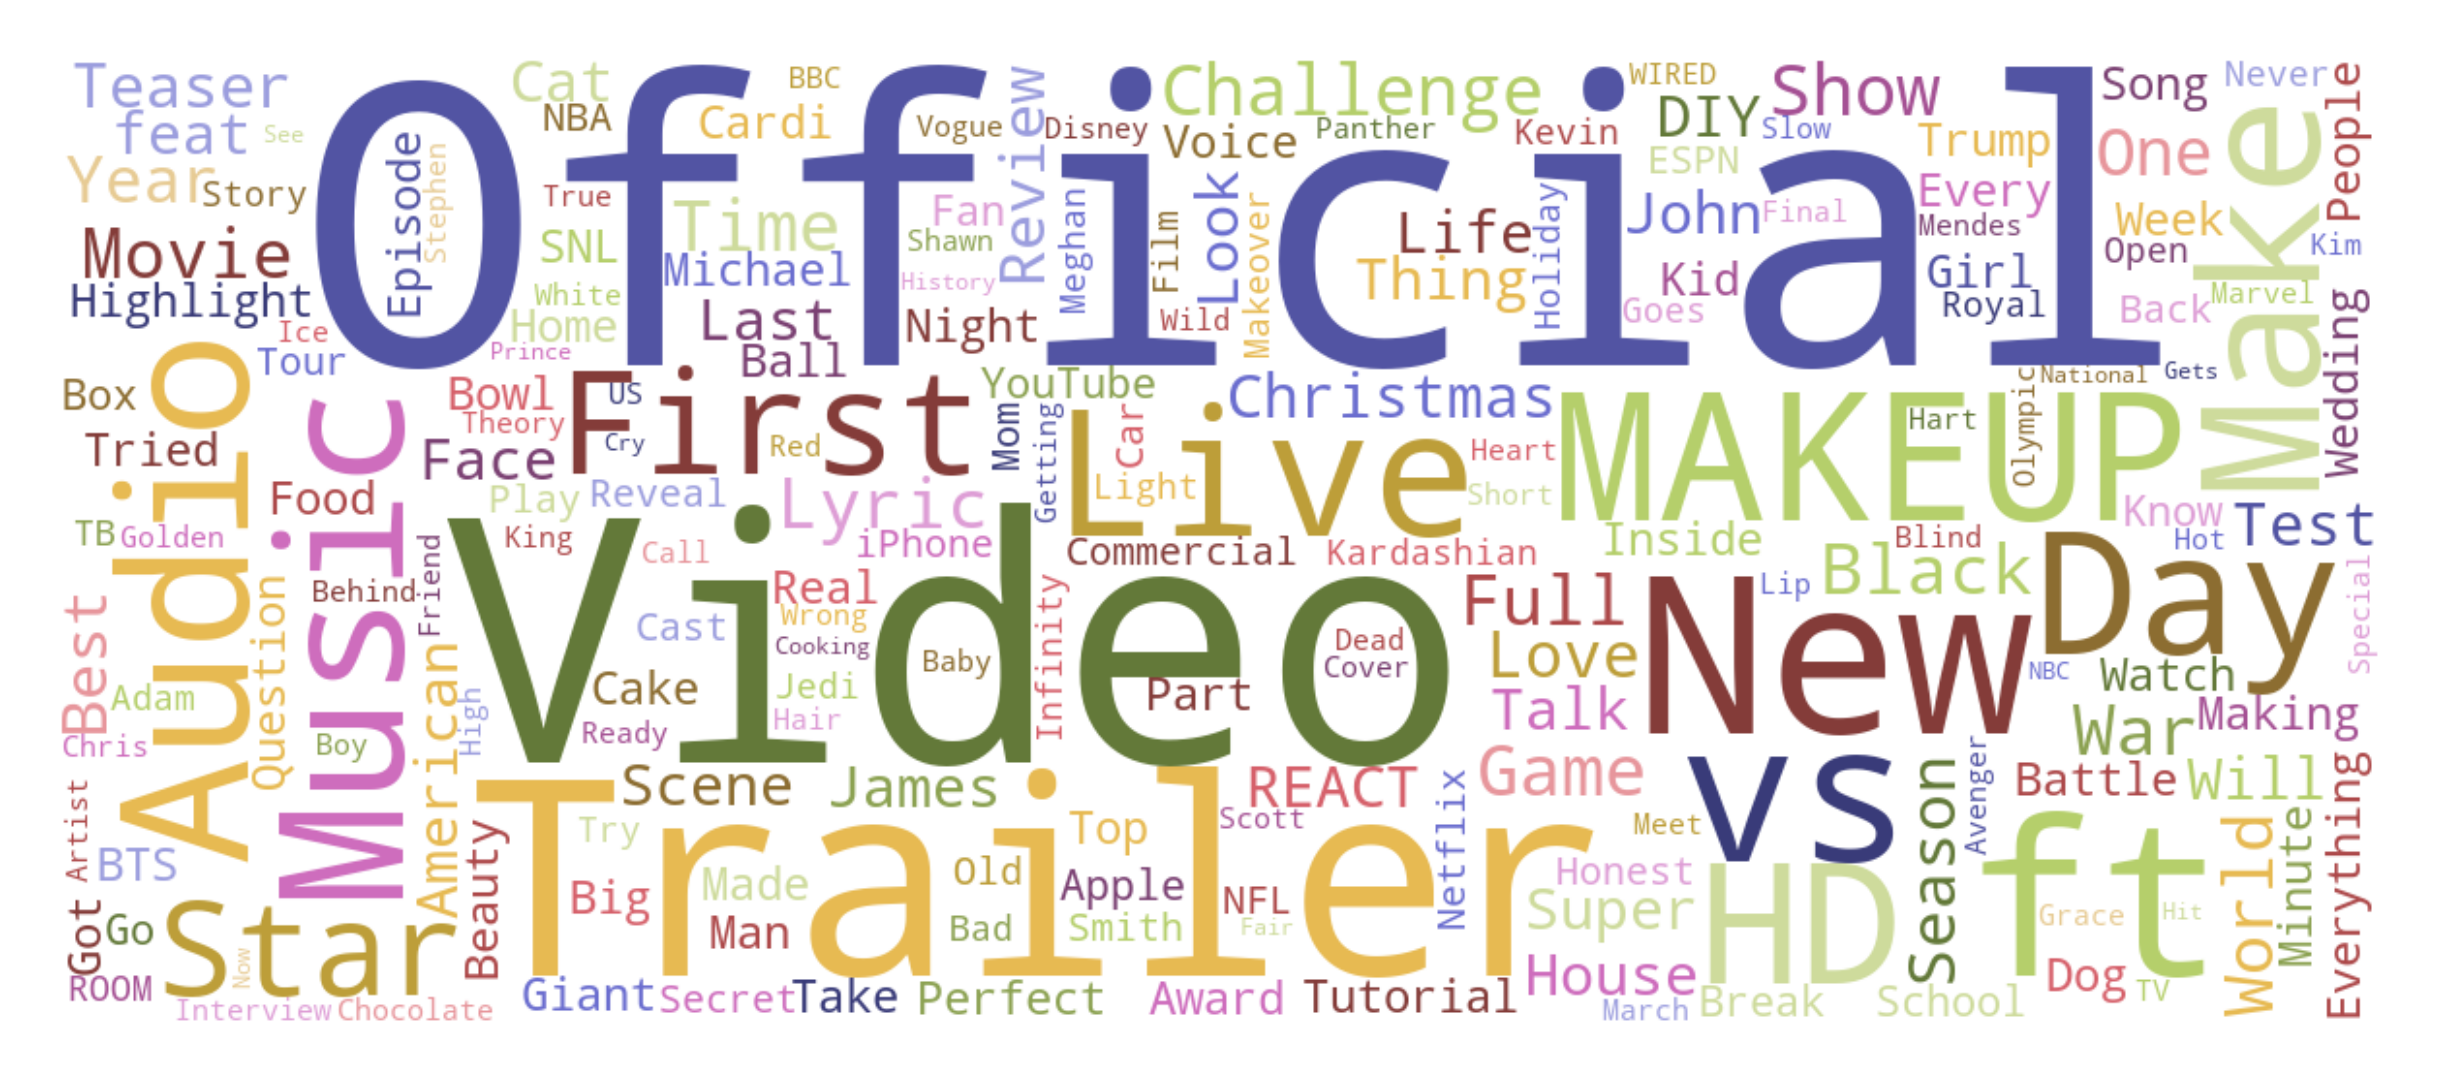

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(
    width=1200,
    height=500,
    collocations=False,
    background_color="white",
    colormap="tab20b",
).generate(" ".join(title_words))
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
_ = plt.axis("off")

## <a name="chan"></a>¿Qué canales tienen el mayor número de vídeos que son tendencia?

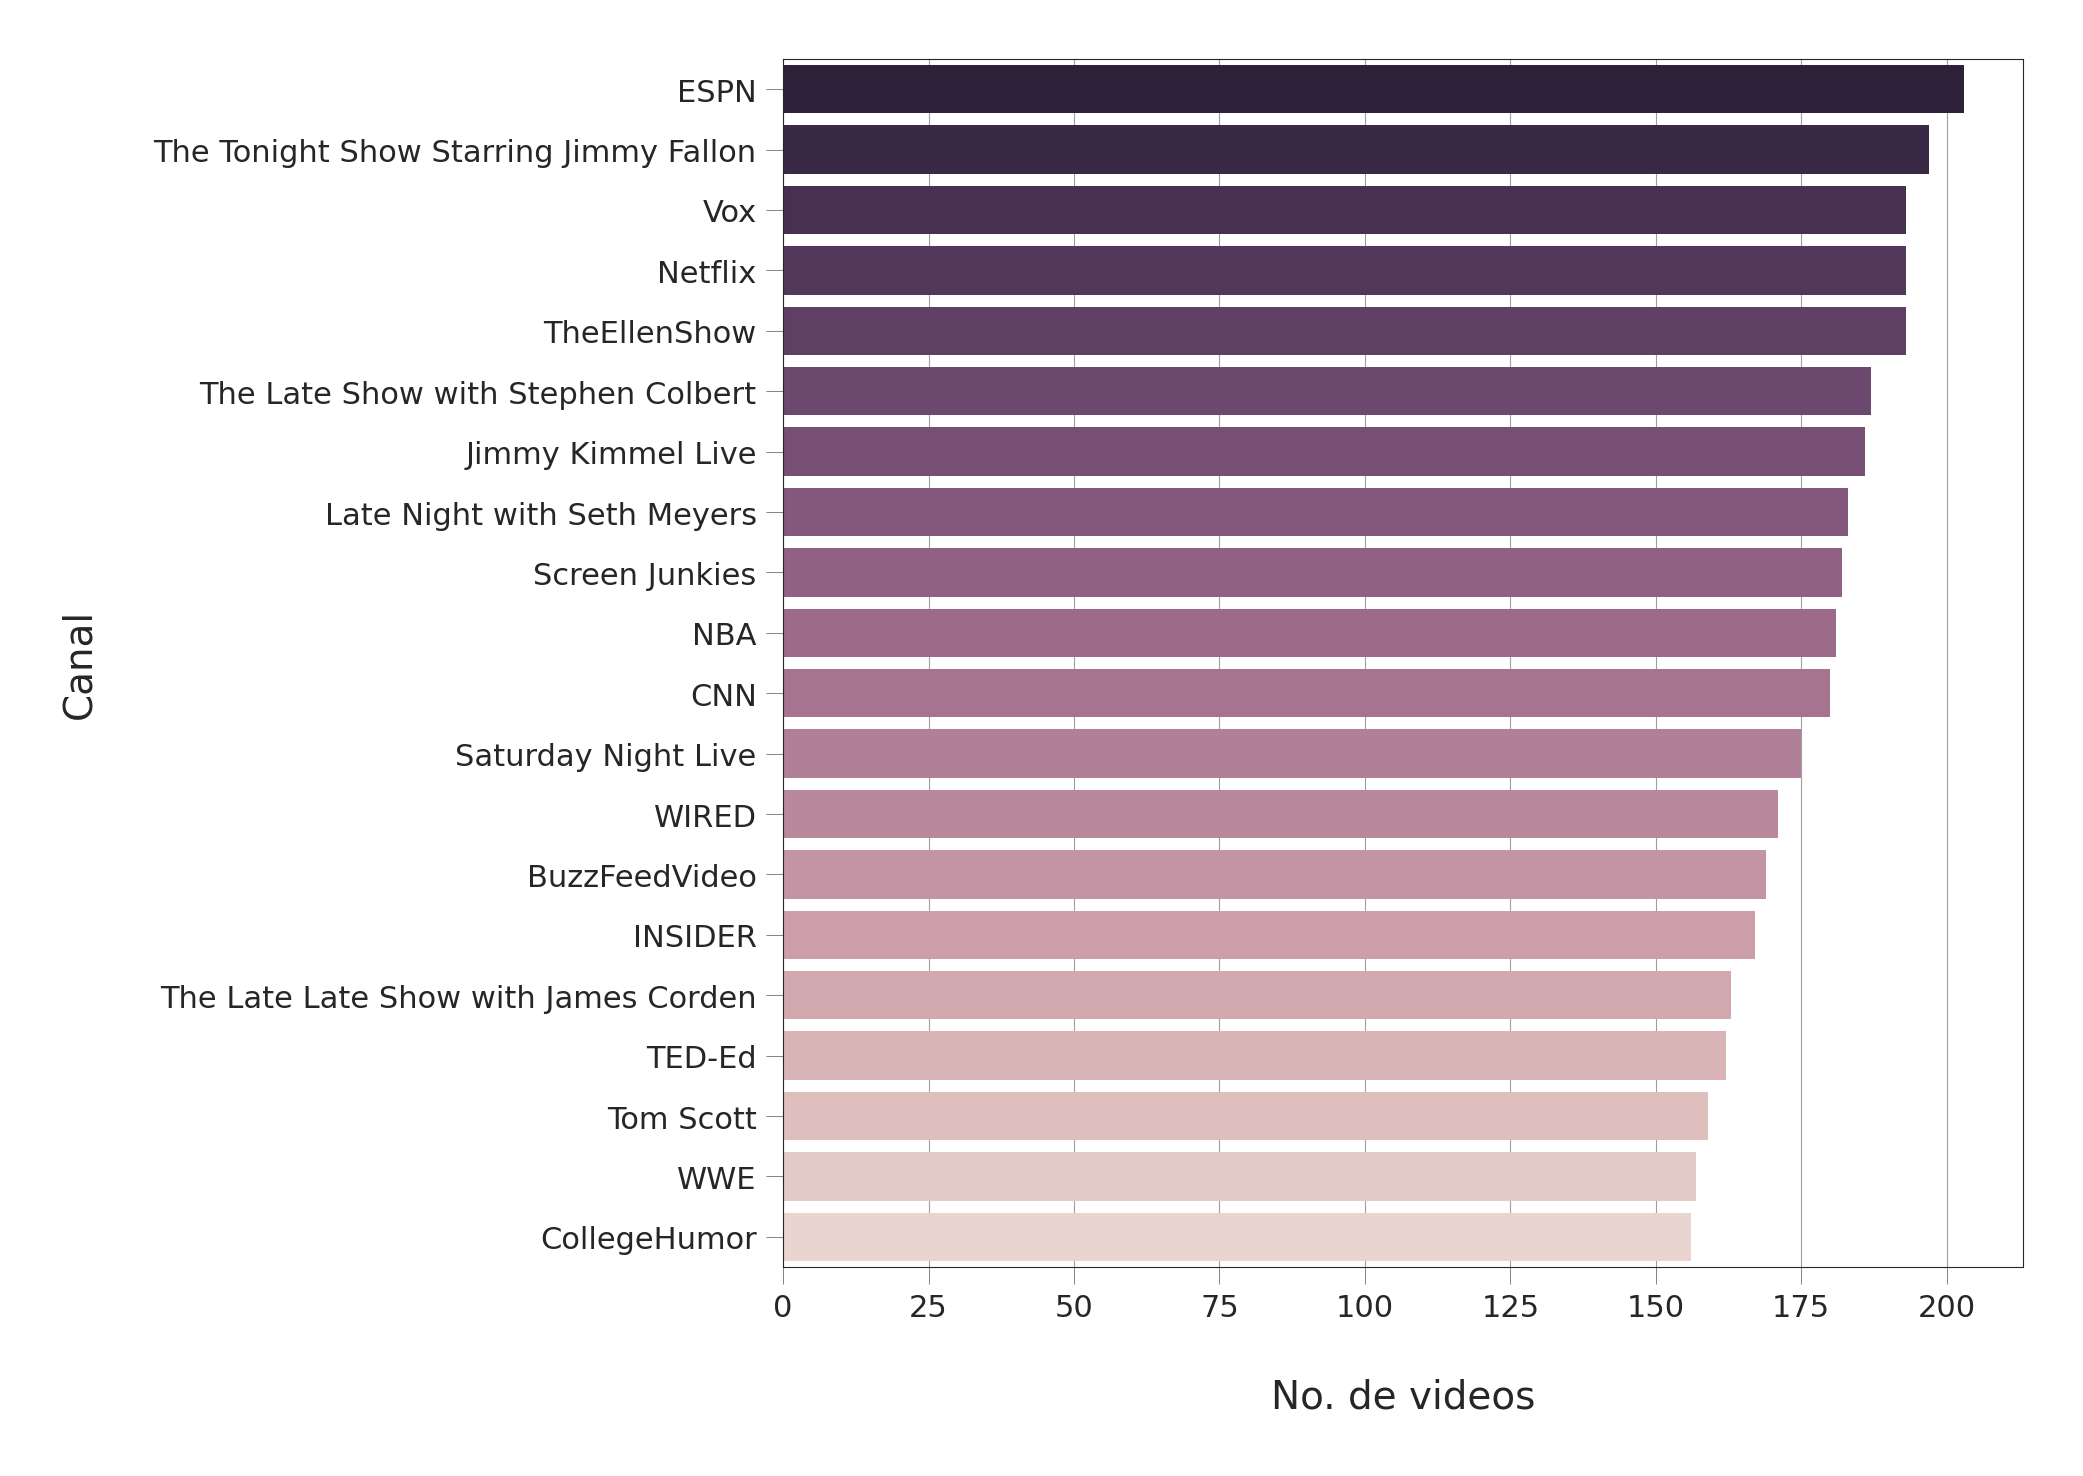

In [ ]:
cdf = (
    df.groupby("channel_title")
    .size()
    .reset_index(name="video_count")
    .sort_values("video_count", ascending=False)
    .head(20)
)

fig, ax = plt.subplots(figsize=(8, 8))
_ = sns.barplot(
    x="video_count",
    y="channel_title",
    data=cdf,
    palette=sns.cubehelix_palette(n_colors=20, reverse=True),
    ax=ax,
)
_ = ax.set(xlabel="No. de videos", ylabel="Canal")

## <a name="cat"></a>¿Qué categoría de vídeo tiene el mayor número de vídeos en tendencia?
En primer lugar, añadiremos una columna que contenga los nombres de las categorías en función de los valores de la columna `category_id`. Utilizaremos un archivo JSON de categoría proporcionado con el conjunto de datos que contiene información sobre cada categoría.

In [ ]:
with open(f"{DATA_DIR / 'youtube_trending/US_category_id.json'}") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df["category_name"] = df["category_id"].map(cat_dict)

Ahora podemos ver qué categoría tiene el mayor número de vídeos que son tendencia

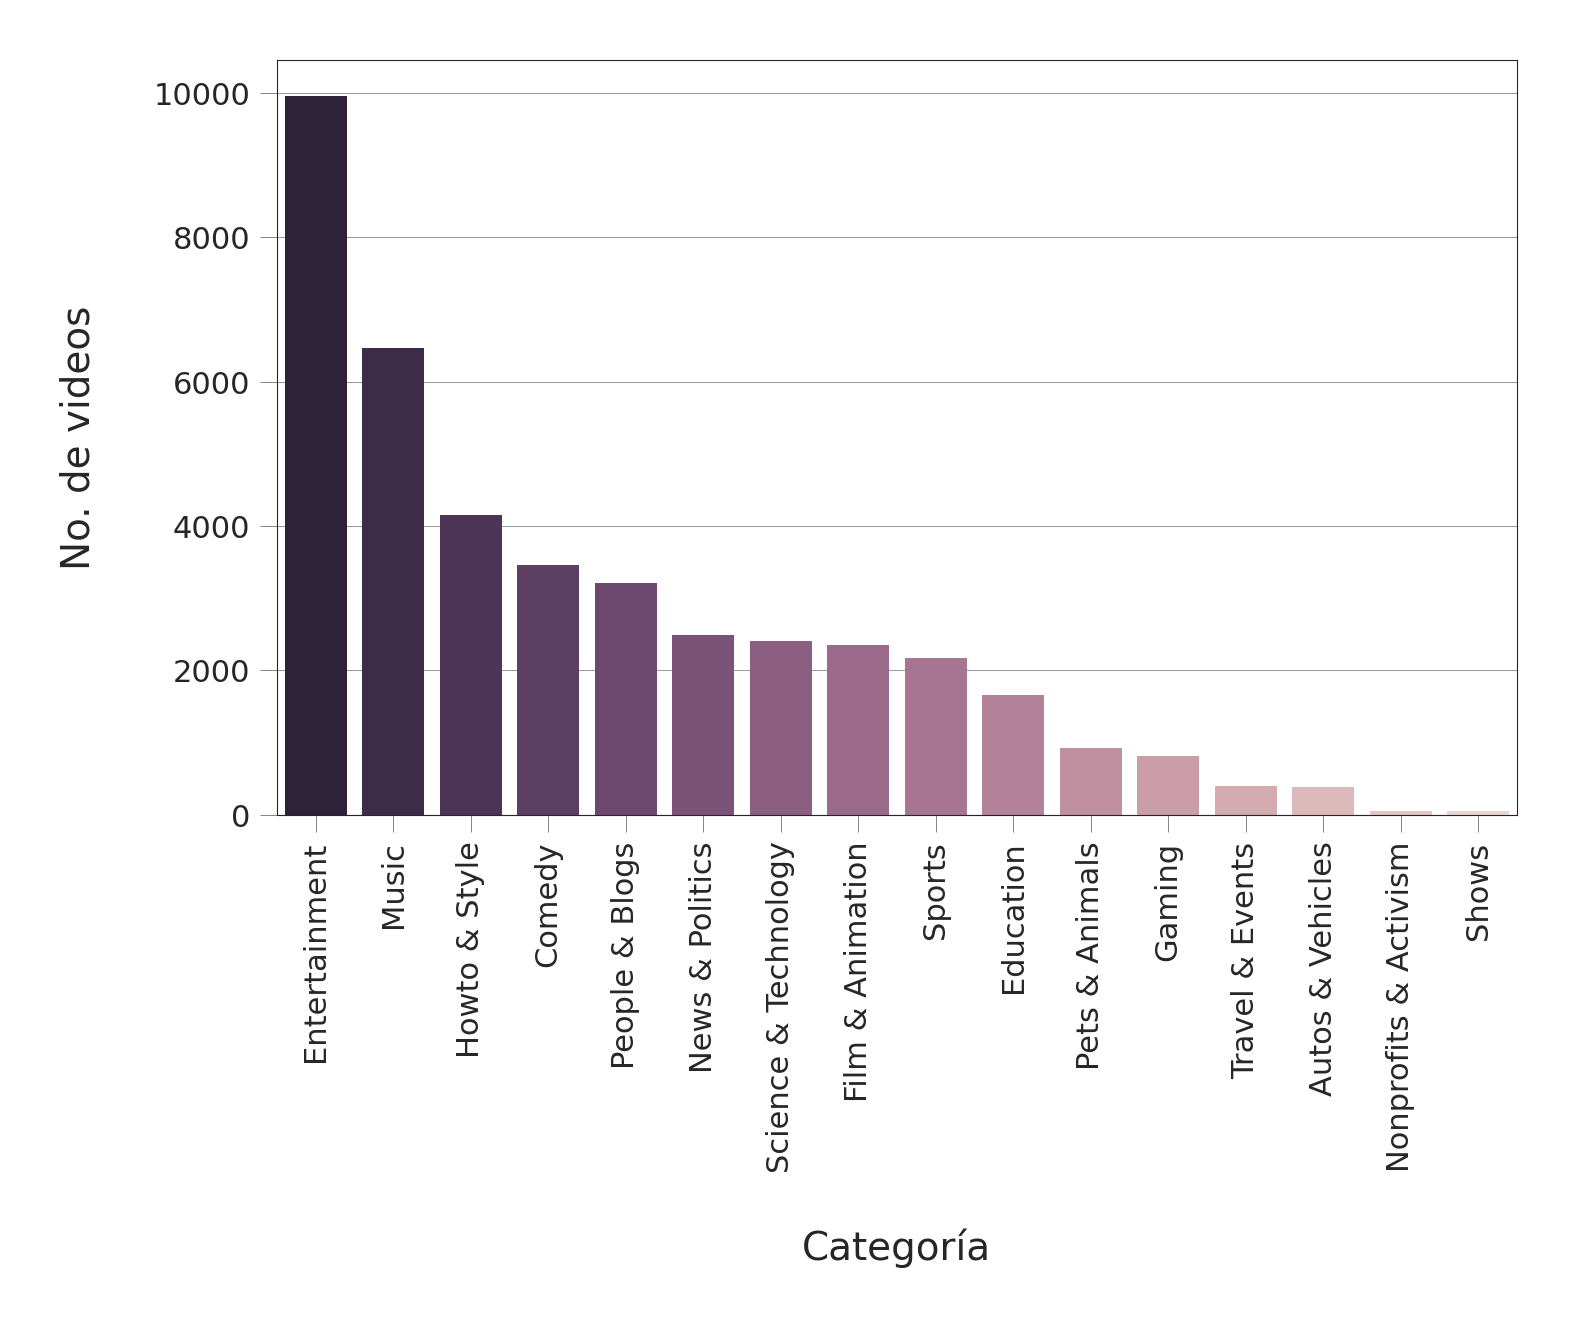

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(
    columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True
)
fig, ax = plt.subplots()
_ = sns.barplot(
    x="category_name",
    y="No_of_videos",
    data=cdf,
    palette=sns.cubehelix_palette(n_colors=16, reverse=True),
    ax=ax,
)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Categoría", ylabel="No. de videos")

Vemos que la categoría de Entretenimiento contiene el mayor número de vídeos de tendencia entre las demás categorías: alrededor de `10.000` vídeos, seguida de la categoría de Música con alrededor de `6.200` vídeos, seguida de la categoría de Howto & Style con alrededor de `4.100` vídeos, y así sucesivamente.

## <a name="pub"></a>Vídeos de tendencia y su hora de publicación
Un valor de ejemplo de la columna `publish_time` en nuestro conjunto de datos es `2017-11-13T17:13:01.000Z`. Y según la información de esta página: https://www.w3.org/TR/NOTE-datetime, esto significa que la fecha de publicación del vídeo es `2017-11-13` y la hora es `17:13:01` en la zona horaria del Tiempo Universal Coordinado (UTC).

Vamos a añadir dos columnas para representar la fecha y la hora de publicación de cada vídeo, y luego eliminar la columna original `publish_time` porque ya no la necesitaremos

In [ ]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime("%a")
)
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels="publish_time", axis=1, inplace=True)

Ahora podemos ver qué días de la semana han tenido el mayor número de vídeos que son tendencia

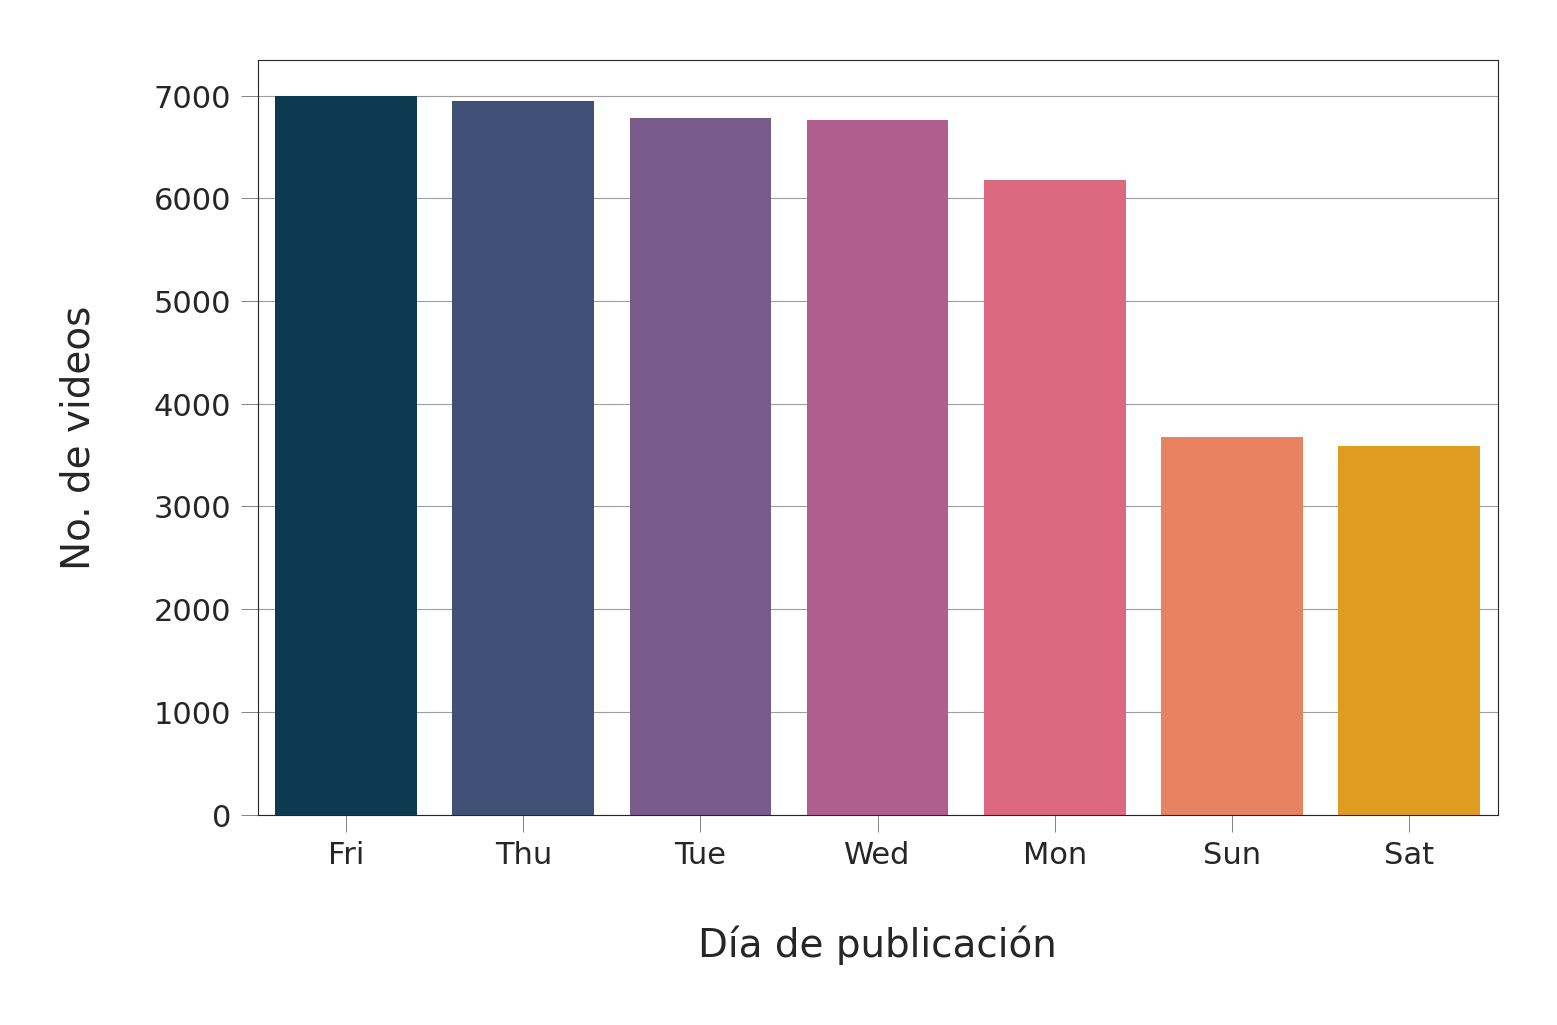

In [ ]:
cdf = (
    df["publishing_day"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
)
fig, ax = plt.subplots()
_ = sns.barplot(
    x="publishing_day",
    y="No_of_videos",
    data=cdf,
    palette=sns.color_palette(
        ["#003f5c", "#374c80", "#7a5195", "#bc5090", "#ef5675", "#ff764a", "#ffa600"],
        n_colors=7,
    ),
    ax=ax,
)
_ = ax.set(xlabel="Día de publicación", ylabel="No. de videos")

Podemos ver que el número de vídeos que son tendencia publicados los domingos y los sábados es notablemente menor que el número de vídeos que son tendencia publicados en otros días de la semana.

Ahora utilicemos la columna `publishing_hour` para ver qué horas de publicación tienen el mayor número de vídeos que son tendencia

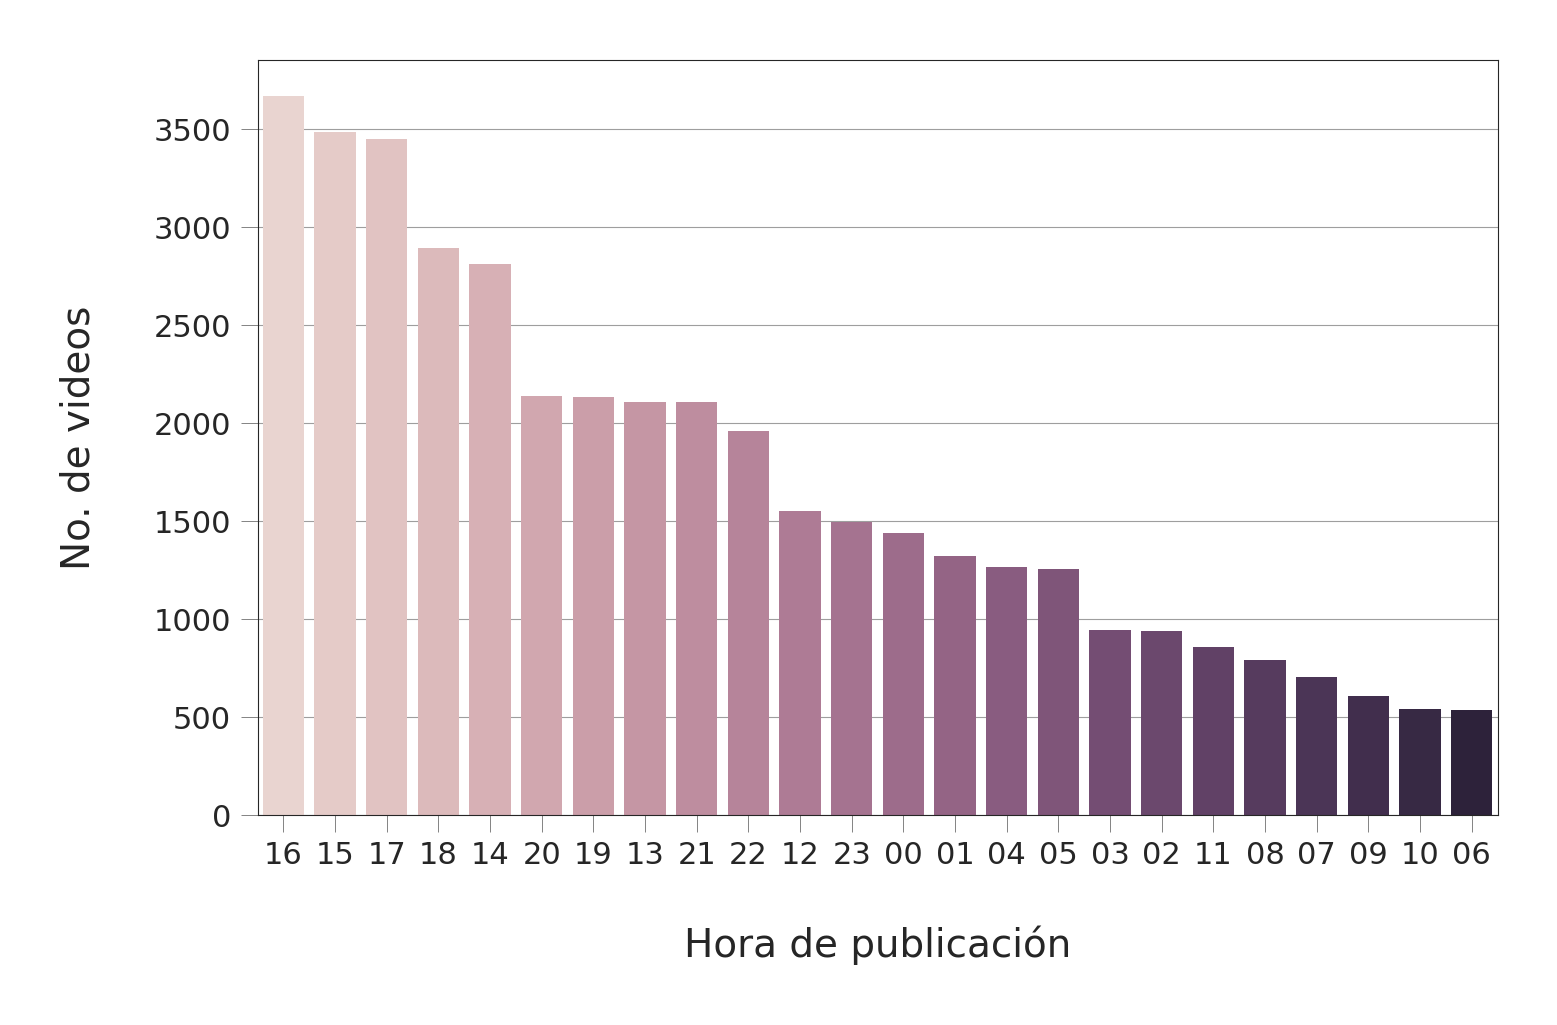

In [ ]:
cdf = (
    df["publishing_hour"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
)
fig, ax = plt.subplots()
_ = sns.barplot(
    x="publishing_hour",
    y="No_of_videos",
    data=cdf,
    palette=sns.cubehelix_palette(n_colors=24),
    ax=ax,
)
_ = ax.set(xlabel="Hora de publicación", ylabel="No. de videos")

Podemos ver que el periodo entre las 14:00 y las 19:00, con un pico entre las 16:00 y las 17:00, tiene el mayor número de vídeos que son tendencia. También observamos que el periodo entre las 12 de la mañana y la 1 de la tarde tiene el menor número de vídeos que son tendencia. Pero, ¿por qué? ¿Se debe a que la gente publica muchos más vídeos entre las 2 y las 7 de la tarde? ¿Se debe a la forma en que el algoritmo de YouTube elige los vídeos que son tendencia?

## <a name="err"></a>¿Cuántos vídeos que son tendencia tienen un error?
Para ver cuántos vídeos que son tendencia han sido eliminados o tienen algún error, podemos utilizar la columna `video_error_or_removed` en el conjunto de datos

False    40926
True        23
Name: video_error_or_removed, dtype: int64

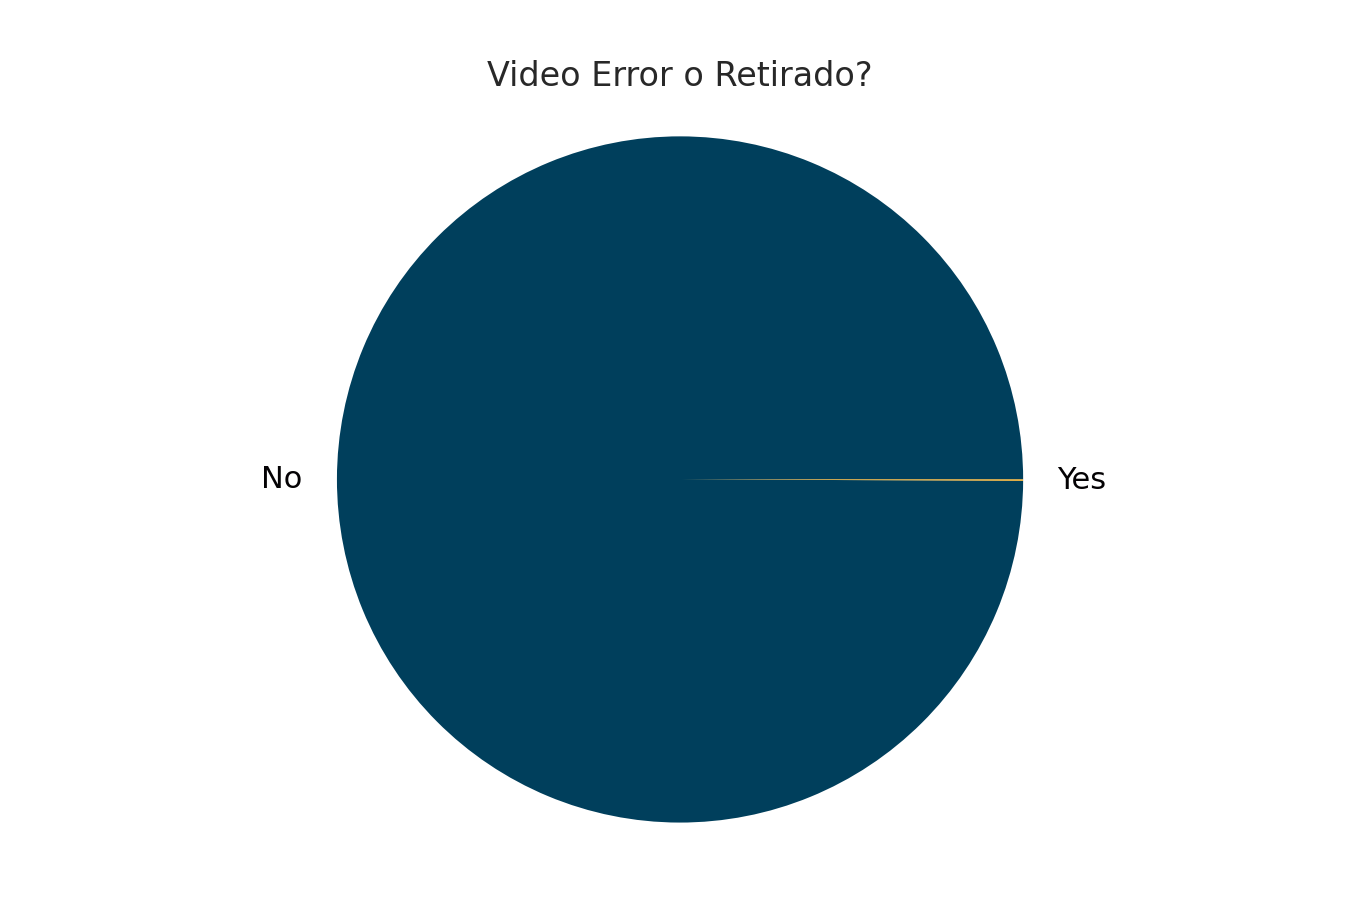

In [ ]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(
    [value_counts[False], value_counts[True]],
    labels=["No", "Yes"],
    colors=["#003f5c", "#ffa600"],
    textprops={"color": "#040204"},
)
_ = ax.axis("equal")
_ = ax.set_title("Video Error o Retirado?")

df["video_error_or_removed"].value_counts()

In [ ]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

Podemos ver que de los vídeos que aparecen en la lista de tendencias (`40949` vídeos), hay una pequeña parte (`23` vídeos) con errores.

## <a name="commdis"></a>¿Cuántos vídeos que son tendencia tienen sus comentarios deshabilitados?
Para saberlo, utilizamos la columna `comments_disabled`.

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

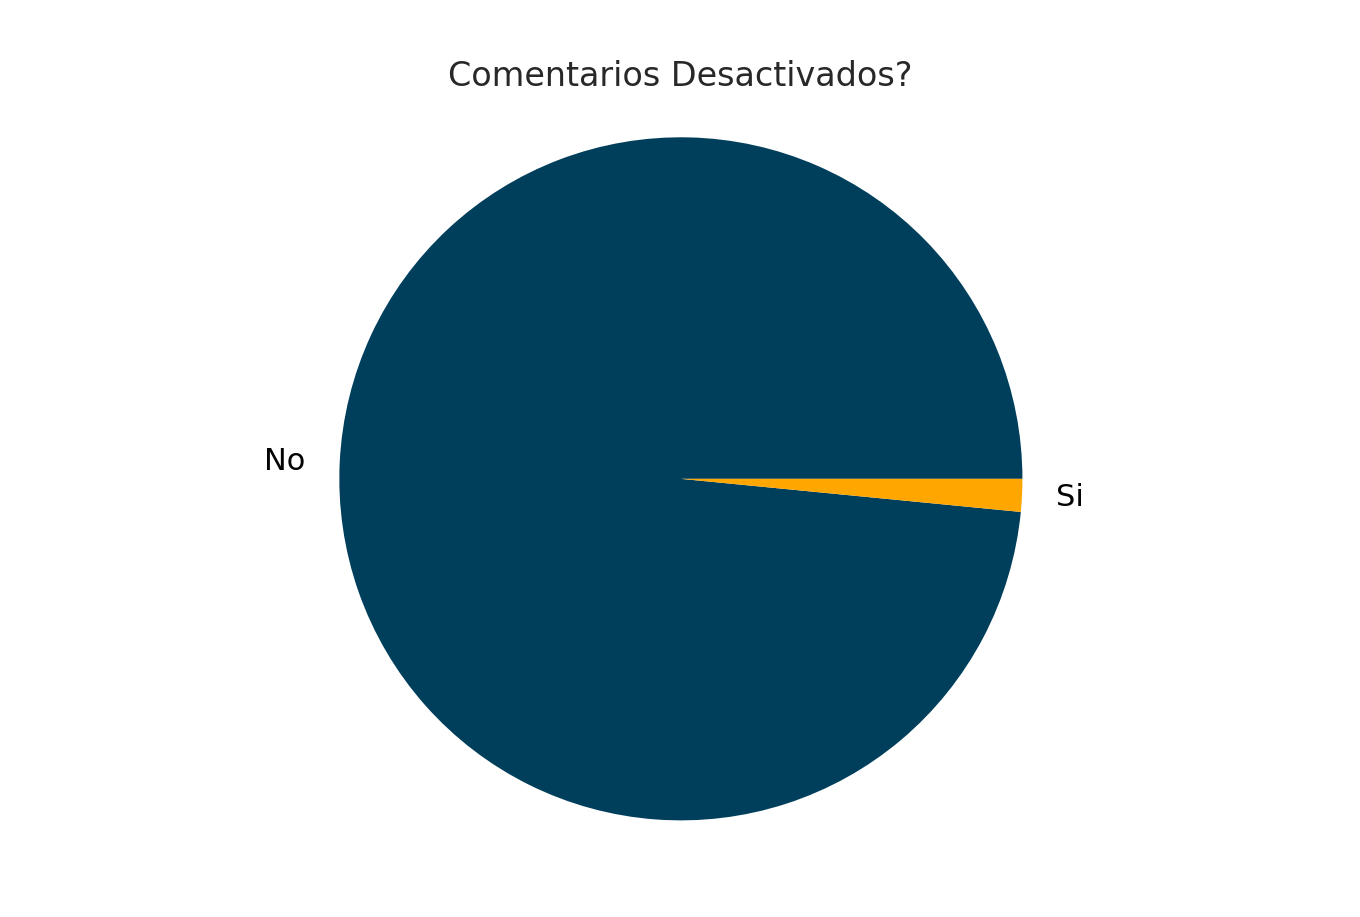

In [ ]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(
    x=[value_counts[False], value_counts[True]],
    labels=["No", "Si"],
    colors=["#003f5c", "#ffa600"],
    textprops={"color": "#040204"},
)
_ = ax.axis("equal")
_ = ax.set_title("Comentarios Desactivados?")

df["comments_disabled"].value_counts(normalize=True)

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

Vemos que sólo el `2%` de los vídeos que son tendencia impidieron que los usuarios comentaran.

## <a name="ratdis"></a>¿Cuántos vídeos que son tendencia tienen sus calificaciones deshabilitadas?
Para saberlo, utilizamos la columna `ratings_disabled`.

False    40780
True       169
Name: ratings_disabled, dtype: int64

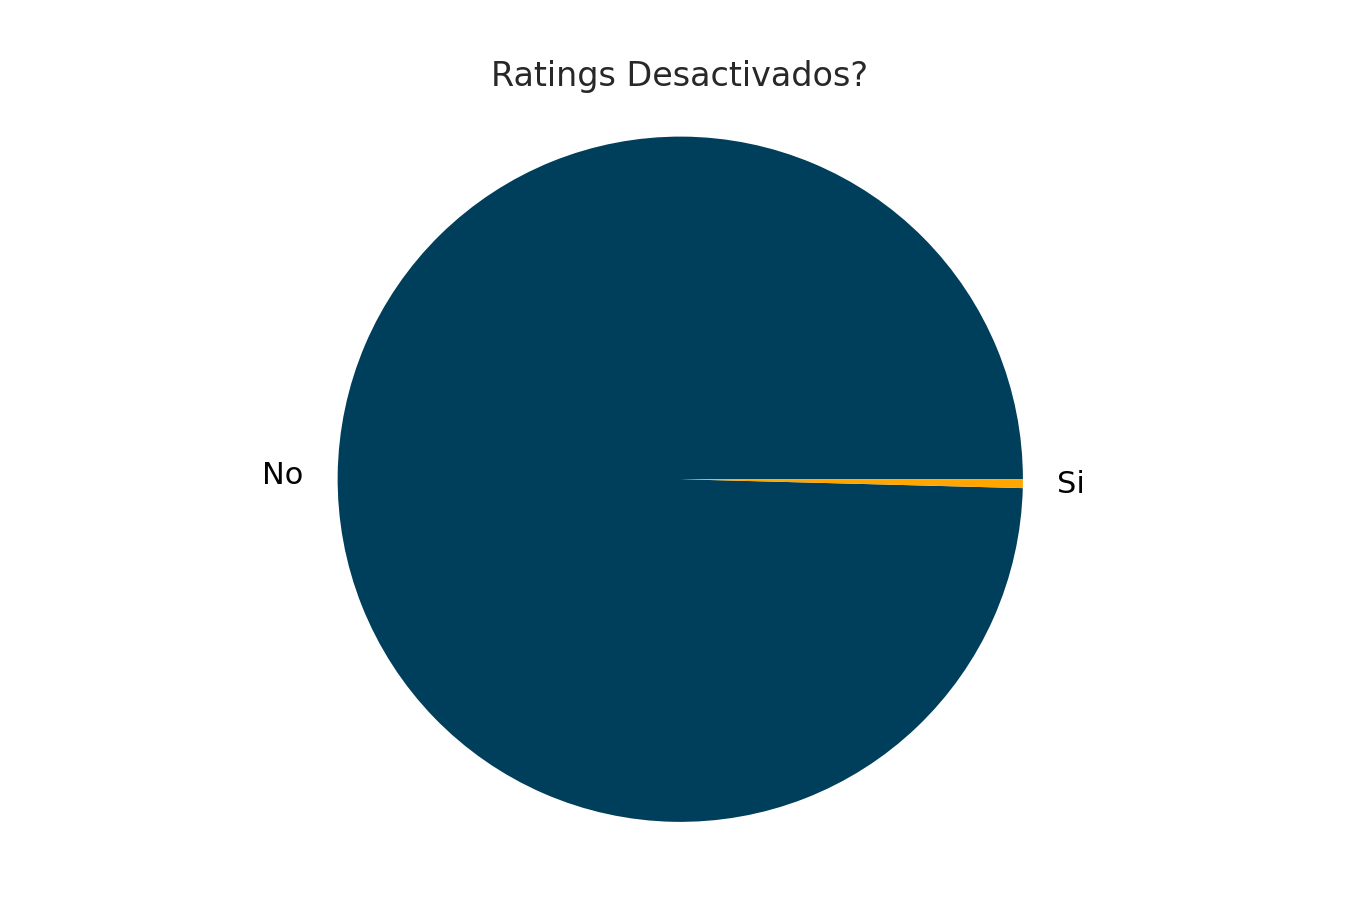

In [ ]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(
    [value_counts[False], value_counts[True]],
    labels=["No", "Si"],
    colors=["#003f5c", "#ffa600"],
    textprops={"color": "#040204"},
)
_ = ax.axis("equal")
_ = ax.set_title("Ratings Desactivados?")

df["ratings_disabled"].value_counts()

In [ ]:
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

Vemos que sólo `169` vídeos de tendencia de los `40949` impidieron a los usuarios hacer comentarios.

## <a name="commratdis"></a>¿Cuántos vídeos tienen desactivados tanto los comentarios como las valoraciones?

In [ ]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

Así que sólo hay `106` vídeos que son tendencia y que tienen desactivados tanto los comentarios como las valoraciones

## <a name="conc"></a>Conclusiones
Estos son algunos de los resultados que hemos extraído del análisis:
* Analizamos un conjunto de datos que contiene información sobre los vídeos que son tendencia en YouTube durante 205 días. El conjunto de datos se recopiló en 2017 y 2018. Contiene **`40949`** entradas de vídeo.
* El `71%` de los vídeos que son tendencia tienen menos de `1,5` millones de visualizaciones, y el **`91%`** tienen menos de **`5`** millones de visualizaciones.
* El 68% de los vídeos que son tendencia tienen menos de 40.000 "me gusta" y el 84% tienen menos de 100.000 "me gusta".
* El 67% de los vídeos que son tendencia tienen menos de 4.000 comentarios y el 93% tienen menos de 25.000.
* Algunos vídeos pueden aparecer en la lista de vídeos de moda más de un día. Nuestro conjunto de datos contiene `40494` entradas pero no para `40494` vídeos únicos sino para `6351` vídeos únicos.
* Los vídeos que son tendencia y que tienen **`100.000.000`** de visualizaciones o más tienen una longitud de título de entre `33` y `55` caracteres aproximadamente.
* Los delimitadores `-` y `|` son comunes en los títulos de los vídeos que son tendencia.
* Las palabras "Oficial", "Vídeo", "Tráiler", "Cómo" y "2018" también son comunes en los títulos de los vídeos que son tendencia.
* Existe una fuerte correlación positiva entre el número de visualizaciones y el número de "me gusta" de los vídeos que son tendencia: A medida que uno de ellos aumenta, el otro también, y viceversa.
* También existe una fuerte correlación positiva entre el número de "me gusta" y el número de comentarios, y una correlación algo más débil entre el número de "no me gusta" y el número de comentarios.
* La categoría que tiene el mayor número de vídeos que son tendencia es **Entretenimiento**, con 9.964 vídeos, seguida de la categoría "Música", con 6.472 vídeos, y de la categoría "Howto & Style", con 4.146 vídeos.
* En el lado opuesto, la categoría que tiene el menor número de vídeos que son tendencia es la de "Espectáculos" con 57 vídeos, seguida por la de "Activismo y sin ánimo de lucro" con 57 vídeos, y por la de "Coches y vehículos" con 384 vídeos.

Original de Ammar Alyousfi [Twitter](https://twitter.com/ammar_cel)  [enlace a su blog](http://ammar-alyousfi.com).
